In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from cliffs_delta import cliffs_delta
from scipy.stats import mannwhitneyu, ks_2samp

In [ ]:
pmd_genres = pd.read_csv("")
emd_genres = pd.read_csv("")

In [4]:
# Count genre occurrences and compute percentages
def compute_genre_stats(df, dataset_name):
    counts = df["reducedGenre"].value_counts()
    percentages = (counts / counts.sum()) * 100
    return counts, percentages

genre_counts_PMD, percentages_PMD = compute_genre_stats(pmd_genres, "PMD")
genre_counts_EMD, percentages_EMD = compute_genre_stats(emd_genres, "EMD")

# Combine datasets for plotting
all_genres = set(genre_counts_PMD.index).union(genre_counts_EMD.index)
df = pd.DataFrame.from_dict(
    {genre: [percentages_PMD.get(genre, 0), percentages_EMD.get(genre, 0),
             genre_counts_PMD.get(genre, 0), genre_counts_EMD.get(genre, 0)]
     for genre in all_genres},
    orient="index",
    columns=["PMD_percentage", "EMD_percentage", "PMD_count", "EMD_count"]
)

# Sort by PMD percentage in ascending order
df_combined = df.sort_values(by="PMD_percentage", ascending=False)
df_combined

,PMD_percentage,EMD_percentage,PMD_count,EMD_count
Pop,34.970635,46.432553,655,4165
Rock,18.152696,20.066890,340,1800
Electronic,8.756006,11.204013,164,1005
Hip Hop,6.673785,5.953177,125,534
R&B,6.193273,9.074693,116,814
Classical,5.872931,0.122631,110,11
Folk/Acoustic,4.111052,2.084727,77,187
Easy listening,3.203417,0.880713,60,79
Metal,2.936466,1.348941,55,121
Latin,2.616124,0.713489,49,64


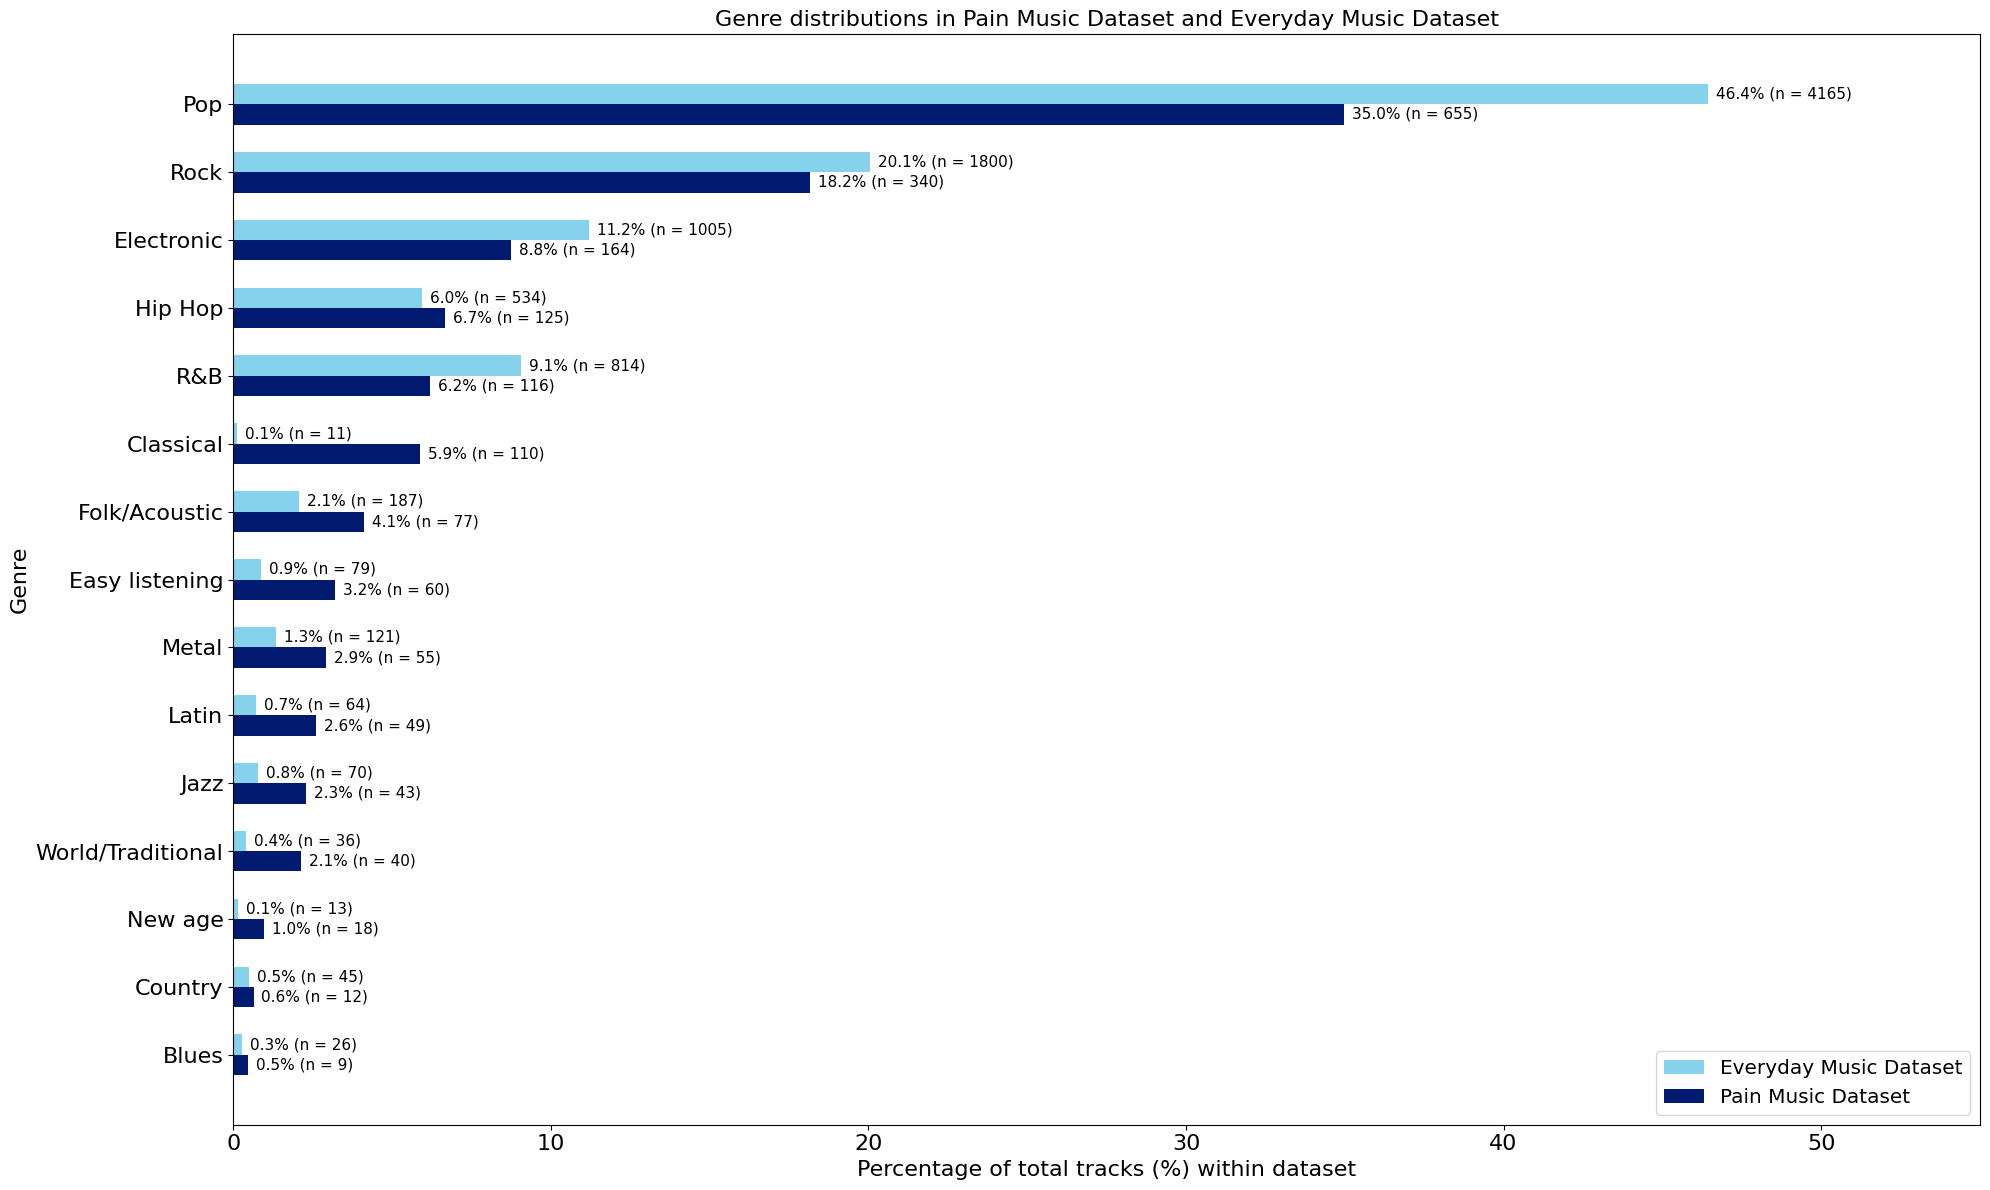

In [ ]:
# # Define the desired order of genres
# filtered_genres = ["Pop", "Rock", "Electronic", "Hip Hop", "R&B", "Classical"]

# # Reorder the filtered DataFrame to match the specified order
# filtered_df = df_combined.loc[filtered_genres].sort_values(by='PMD_percentage', ascending=True)

filtered_df = df_combined.sort_values(by='PMD_percentage', ascending=True)

# Plot
plt.figure(figsize=(20, 12))
bar_width = 0.3
y_positions = range(len(filtered_df))

# Plot EMD first for each genre (dark blue on top)
plt.barh(
    y=[y + bar_width / 2 for y in y_positions],
    width=filtered_df['EMD_percentage'],
    color="#86D2EC", 
    label="Everyday Music Dataset",
    height=bar_width,
)

# Plot PMD second for each genre (light blue below)
plt.barh(
    y=[y - bar_width / 2 for y in y_positions],
    width=filtered_df['PMD_percentage'],
    color="#021A70", #021A70
    label="Pain Music Dataset",
    height=bar_width,
)

# Add labels to the bars with exact percentage followed by count
for i, (pmd_percent, emd_percent, pmd_count, emd_count) in enumerate(
    zip(
        filtered_df['PMD_percentage'], 
        filtered_df['EMD_percentage'], 
        filtered_df['PMD_count'], 
        filtered_df['EMD_count']
    )
):
    plt.text(emd_percent + 0.25, i + bar_width / 2, f"{emd_percent:.1f}% (n = {emd_count})", va="center", fontsize=11)
    plt.text(pmd_percent + 0.25, i - bar_width / 2, f"{pmd_percent:.1f}% (n = {pmd_count})", va="center", fontsize=11)

# Add axis labels and title
plt.xlim(0, 55)
plt.xticks(fontsize=16)
plt.xlabel("Percentage of total tracks (%) within dataset", fontsize=16)
plt.ylabel("Genre", fontsize=16)
plt.yticks(ticks=y_positions, labels=filtered_df.index, fontsize=16)
plt.title("Genre distributions in Pain Music Dataset and Everyday Music Dataset", fontsize=16)
plt.legend(loc='lower right', fontsize="x-large")  # Ensure the legend starts with EMD

plt.tight_layout()
plt.show()

In [6]:
# Calculate genre proportions for both datasets
pmd_proportions = df['PMD_count'] / df['PMD_count'].sum()
emd_proportions = df['EMD_count'] / df['EMD_count'].sum()

# Define a function to calculate entropy
def calculate_entropy(proportions):
    proportions = proportions[proportions > 0]  # Filter out zero proportions
    return -np.sum(proportions * np.log2(proportions))

# Calculate entropy for PMD and EMD
pmd_entropy = calculate_entropy(pmd_proportions)
emd_entropy = calculate_entropy(emd_proportions)

# Display results
print(f"Genre diversity (entropy) for PMD: {pmd_entropy:.4f}")
print(f"Genre diversity (entropy) for EMD: {emd_entropy:.4f}")

Genre diversity (entropy) for PMD: 3.0609
Genre diversity (entropy) for EMD: 2.3753


In [7]:
# Use the counts for both datasets
chi_square_data = df[['PMD_count', 'EMD_count']]

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(chi_square_data)

# Display the results
print(f"Chi-Square statistic: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value}")
print("Expected frequencies:")
print(pd.DataFrame(expected, index=df.index, columns=['PMD_expected', 'EMD_expected']))

Chi-Square statistic: 840.9863498872792
Degrees of freedom: 14
P-value: 1.8775094366924052e-170
Expected frequencies:
                   PMD_expected  EMD_expected
New age                5.354883     25.645117
Classical             20.901319    100.098681
Electronic           201.930923    967.069077
R&B                  160.646500    769.353500
Folk/Acoustic         45.602877    218.397123
Easy listening        24.010606    114.989394
Jazz                  19.519413     93.480587
Blues                  6.045836     28.954164
Latin                 19.519413     93.480587
World/Traditional     13.128101     62.871899
Country                9.846076     47.153924
Rock                 369.659688   1770.340312
Hip Hop              113.834455    545.165545
Pop                  832.597989   3987.402011
Metal                 30.401918    145.598082


In [ ]:
SAF_PMD = pd.read_csv("")
saf = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]

# Set flag to quickly enable or disable duplicate removal
remove_duplicates = False # Set to False if you don't want to remove duplicates

# Count duplicates in the "Track ID" column
duplicate_count = SAF_PMD.duplicated(subset="Track ID").sum()
print(f"Number of duplicate rows in 'Track ID': {duplicate_count}")

# Conditionally remove duplicate rows in the "Track ID" column
if remove_duplicates:
    SAF_PMD = SAF_PMD.drop_duplicates(subset="Track ID", keep="first").reset_index(drop=True)

genres_PMD = pd.read_csv("")

# Function to merge genres with embeddings
def merge_genres_with_SAF(genres_df, SAF_PMD):
    # Deduplicate embeddings DataFrame to ensure one row per Track ID
    SAF_PMD_unique = SAF_PMD.drop_duplicates(subset=['Track ID'], keep='first')
    
    # Perform the left merge
    merged_df = pd.merge(genres_df, SAF_PMD_unique, on='Track ID', how='left')
    
    # Validate row count matches genres_df
    if merged_df.shape[0] != genres_df.shape[0]:
        raise ValueError(f"Row count mismatch: {merged_df.shape[0]} rows in merged DataFrame, expected {genres_df.shape[0]}.")
    
    return merged_df

# Merge genres_PMD and genres_EMD with their respective embeddings
genres_SAF_PMD = merge_genres_with_SAF(genres_PMD, SAF_PMD)

Number of duplicate rows in 'Track ID': 116


In [ ]:
SAF_EMD = pd.read_csv("")
genres_EMD = pd.read_csv("")

# Function to merge genres with embeddings
def merge_genres_with_SAF(genres_df, SAF_EMD):
    # Deduplicate embeddings DataFrame to ensure one row per Track ID
    SAF_EMD_unique = SAF_EMD.drop_duplicates(subset=['Track ID'], keep='first')
    
    # Perform the left merge
    merged_df = pd.merge(genres_df, SAF_EMD_unique, on='Track ID', how='left')
    
    # Validate row count matches genres_df
    if merged_df.shape[0] != genres_df.shape[0]:
        raise ValueError(f"Row count mismatch: {merged_df.shape[0]} rows in merged DataFrame, expected {genres_df.shape[0]}.")
    
    return merged_df

# Merge genres_PMD and genres_EMD with their respective embeddings
genres_SAF_EMD = merge_genres_with_SAF(genres_EMD, SAF_EMD)

In [10]:
# Get unique genres
unique_genres = pd.concat([genres_SAF_EMD['reducedGenre'], genres_SAF_PMD['reducedGenre']]).unique()

# Dictionary to store dataframes for each genre
genre_comparison_dataframes = {}

# Compute statistics for each genre
for genre in unique_genres:
    # Filter dataframes by genre
    emd_genre_data = genres_SAF_EMD[genres_SAF_EMD['reducedGenre'] == genre]
    pmd_genre_data = genres_SAF_PMD[genres_SAF_PMD['reducedGenre'] == genre]

    # Calculate track counts and percentages for each genre in both datasets
    emd_track_count = len(emd_genre_data)
    pmd_track_count = len(pmd_genre_data)

    emd_percentage = (emd_track_count / len(genres_SAF_EMD)) * 100
    pmd_percentage = (pmd_track_count / len(genres_SAF_PMD)) * 100

    # Calculate statistics
    emd_stats = emd_genre_data[saf].agg(['mean', 'median', 'std']).T
    pmd_stats = pmd_genre_data[saf].agg(['mean', 'median', 'std']).T

    # Combine statistics for easy side-by-side comparison
    comparison_df = pd.DataFrame({
        'Feature': saf,
        'EMD_mean': emd_stats['mean'].values,
        'PMD_mean': pmd_stats['mean'].values,
        'EMD_median': emd_stats['median'].values,
        'PMD_median': pmd_stats['median'].values,
        'EMD_std': emd_stats['std'].values,
        'PMD_std': pmd_stats['std'].values
    })

    # Store the dataframe in the dictionary
    genre_comparison_dataframes[genre] = comparison_df

    # Print and display the dataframe
    print(f"Genre: {genre} | EMD Tracks: {emd_track_count} ({emd_percentage:.2f}%) | PMD Tracks: {pmd_track_count} ({pmd_percentage:.2f}%)")
    display(comparison_df)

Genre: Pop | EMD Tracks: 4165 (46.43%) | PMD Tracks: 655 (34.97%)


,Feature,EMD_mean,PMD_mean,EMD_median,PMD_median,EMD_std,PMD_std
0,Danceability,0.627902,0.587578,0.638000,0.608500,0.134613,0.156055
1,Energy,0.693757,0.610331,0.723000,0.637500,0.189648,0.214234
2,Loudness,-7.420689,-7.481338,-6.799000,-6.698000,3.124809,3.311860
3,Speechiness,0.059851,0.059884,0.041700,0.041650,0.054371,0.056085
4,Acousticness,0.204885,0.310577,0.107000,0.199000,0.230805,0.299671
5,Instrumentalness,0.029317,0.040408,0.000004,0.000002,0.124924,0.166273
6,Liveness,0.195401,0.178583,0.133000,0.117500,0.162247,0.156517
7,Valence,0.586958,0.496252,0.612000,0.480000,0.249502,0.254829
8,Tempo,122.639257,121.841087,122.039500,121.824500,26.428351,27.456005


Genre: Hip Hop | EMD Tracks: 534 (5.95%) | PMD Tracks: 125 (6.67%)


,Feature,EMD_mean,PMD_mean,EMD_median,PMD_median,EMD_std,PMD_std
0,Danceability,0.753187,0.718944,0.7700,0.7365,0.121751,0.129648
1,Energy,0.698749,0.680290,0.7055,0.6895,0.141935,0.156886
2,Loudness,-7.024536,-6.263427,-6.5360,-5.9420,2.976620,2.556564
3,Speechiness,0.161916,0.154327,0.1370,0.1330,0.109389,0.105590
4,Acousticness,0.142194,0.178191,0.0840,0.1215,0.164642,0.184899
5,Instrumentalness,0.011793,0.001479,0.0000,0.0000,0.073037,0.008370
6,Liveness,0.193356,0.176285,0.1270,0.1260,0.158896,0.127511
7,Valence,0.634636,0.578965,0.6575,0.5850,0.196084,0.229684
8,Tempo,112.152258,120.567008,106.0760,112.5925,25.029578,29.722171


Genre: Electronic | EMD Tracks: 1005 (11.20%) | PMD Tracks: 164 (8.76%)


,Feature,EMD_mean,PMD_mean,EMD_median,PMD_median,EMD_std,PMD_std
0,Danceability,0.668358,0.636915,0.6690,0.6730,0.113139,0.158488
1,Energy,0.812767,0.708145,0.8400,0.7830,0.135015,0.256631
2,Loudness,-6.981675,-8.364067,-6.6040,-6.7775,2.636118,6.257129
3,Speechiness,0.065172,0.076766,0.0483,0.0505,0.052143,0.072127
4,Acousticness,0.064092,0.193738,0.0156,0.0366,0.122726,0.310237
5,Instrumentalness,0.220366,0.303289,0.0079,0.0521,0.331925,0.370017
6,Liveness,0.203003,0.174324,0.1400,0.1135,0.164277,0.144357
7,Valence,0.559129,0.426132,0.5750,0.4125,0.241467,0.239919
8,Tempo,128.206506,127.408555,127.9360,125.9915,13.906147,25.033469


Genre: R&B | EMD Tracks: 814 (9.07%) | PMD Tracks: 116 (6.19%)


,Feature,EMD_mean,PMD_mean,EMD_median,PMD_median,EMD_std,PMD_std
0,Danceability,0.705940,0.656328,0.721500,0.662500,0.121536,0.172385
1,Energy,0.663623,0.580898,0.681000,0.600500,0.176419,0.191073
2,Loudness,-8.759328,-8.596388,-8.342500,-8.217000,3.368380,3.240341
3,Speechiness,0.066721,0.080663,0.047700,0.054400,0.054000,0.071290
4,Acousticness,0.180349,0.290056,0.107000,0.180500,0.201483,0.262441
5,Instrumentalness,0.030326,0.037857,0.000071,0.000053,0.107846,0.132344
6,Liveness,0.173072,0.139874,0.111500,0.105000,0.157369,0.107390
7,Valence,0.689747,0.585103,0.745000,0.607000,0.222618,0.259733
8,Tempo,113.883934,118.306759,112.492000,115.652000,21.685626,29.200792


Genre: Rock | EMD Tracks: 1800 (20.07%) | PMD Tracks: 340 (18.15%)


,Feature,EMD_mean,PMD_mean,EMD_median,PMD_median,EMD_std,PMD_std
0,Danceability,0.572610,0.523962,0.582000,0.510000,0.142391,0.143742
1,Energy,0.696279,0.666046,0.727000,0.706000,0.188424,0.239938
2,Loudness,-8.322409,-7.920485,-7.714500,-6.990000,3.328534,4.075283
3,Speechiness,0.047508,0.058246,0.036700,0.038700,0.031982,0.048666
4,Acousticness,0.173569,0.216679,0.089850,0.084500,0.204624,0.278723
5,Instrumentalness,0.034380,0.061803,0.000046,0.000107,0.120978,0.171447
6,Liveness,0.198598,0.184217,0.134000,0.126000,0.170094,0.151868
7,Valence,0.585858,0.505468,0.608000,0.491500,0.245049,0.246012
8,Tempo,121.610796,121.758018,119.939500,120.056000,26.720625,27.907875


Genre: Folk/Acoustic | EMD Tracks: 187 (2.08%) | PMD Tracks: 77 (4.11%)


,Feature,EMD_mean,PMD_mean,EMD_median,PMD_median,EMD_std,PMD_std
0,Danceability,0.557706,0.582740,0.561000,0.599000,0.138379,0.145712
1,Energy,0.617174,0.496416,0.669000,0.520000,0.212053,0.219446
2,Loudness,-7.930481,-9.023623,-7.072000,-8.626000,3.246390,2.912193
3,Speechiness,0.040686,0.055723,0.033500,0.034300,0.019375,0.064290
4,Acousticness,0.281569,0.461289,0.175000,0.504000,0.297829,0.327904
5,Instrumentalness,0.011079,0.063652,0.000007,0.000223,0.071806,0.185136
6,Liveness,0.162572,0.146309,0.112000,0.110000,0.127820,0.110637
7,Valence,0.506757,0.474447,0.490000,0.432000,0.214202,0.239357
8,Tempo,118.990380,114.530169,118.696000,112.195000,29.114277,27.272451


Genre: Metal | EMD Tracks: 121 (1.35%) | PMD Tracks: 55 (2.94%)


,Feature,EMD_mean,PMD_mean,EMD_median,PMD_median,EMD_std,PMD_std
0,Danceability,0.498149,0.473382,0.505000,0.503000,0.137906,0.131787
1,Energy,0.783149,0.864509,0.832000,0.905000,0.172735,0.133499
2,Loudness,-6.450570,-4.982964,-5.692000,-4.698000,2.898721,1.848003
3,Speechiness,0.057317,0.070829,0.044500,0.054600,0.039051,0.044852
4,Acousticness,0.097159,0.017823,0.010800,0.000757,0.175013,0.102119
5,Instrumentalness,0.023446,0.100233,0.000073,0.000819,0.091246,0.224616
6,Liveness,0.199361,0.218007,0.143000,0.144000,0.146750,0.163602
7,Valence,0.479619,0.392545,0.448000,0.340000,0.248282,0.211896
8,Tempo,125.827744,124.645255,125.023000,125.104000,31.226445,29.886718


Genre: World/Traditional | EMD Tracks: 36 (0.40%) | PMD Tracks: 40 (2.14%)


,Feature,EMD_mean,PMD_mean,EMD_median,PMD_median,EMD_std,PMD_std
0,Danceability,0.639083,0.594775,0.662000,0.596000,0.142246,0.146620
1,Energy,0.728167,0.526400,0.782500,0.515500,0.171567,0.200620
2,Loudness,-9.146500,-9.835700,-9.616000,-9.547500,3.047781,3.082485
3,Speechiness,0.063875,0.070187,0.041550,0.045950,0.054882,0.073693
4,Acousticness,0.256433,0.574725,0.229000,0.710000,0.222556,0.308899
5,Instrumentalness,0.111763,0.109991,0.000005,0.000056,0.276768,0.244729
6,Liveness,0.221214,0.218075,0.133500,0.173000,0.190158,0.160632
7,Valence,0.720361,0.595575,0.756500,0.633000,0.208030,0.252888
8,Tempo,120.713694,105.372750,122.675500,101.027500,28.818473,22.118954


Genre: Easy listening | EMD Tracks: 79 (0.88%) | PMD Tracks: 60 (3.20%)


,Feature,EMD_mean,PMD_mean,EMD_median,PMD_median,EMD_std,PMD_std
0,Danceability,0.586987,0.478900,0.62600,0.463500,0.193728,0.200057
1,Energy,0.538367,0.442743,0.51900,0.410000,0.212118,0.221494
2,Loudness,-10.497152,-10.839250,-10.19600,-10.351500,4.135859,4.052709
3,Speechiness,0.049897,0.066617,0.03680,0.041100,0.037785,0.069761
4,Acousticness,0.312616,0.453517,0.23300,0.500500,0.278475,0.329910
5,Instrumentalness,0.058272,0.141444,0.00001,0.000117,0.200327,0.290390
6,Liveness,0.197200,0.178882,0.12900,0.120000,0.155491,0.184410
7,Valence,0.557148,0.398183,0.61400,0.347000,0.278921,0.281045
8,Tempo,123.771582,115.349783,123.06400,113.482000,25.881243,29.246706


Genre: Jazz | EMD Tracks: 70 (0.78%) | PMD Tracks: 43 (2.30%)


,Feature,EMD_mean,PMD_mean,EMD_median,PMD_median,EMD_std,PMD_std
0,Danceability,0.658657,0.584116,0.665000,0.635000,0.141609,0.157627
1,Energy,0.588850,0.360072,0.596000,0.320000,0.226069,0.228953
2,Loudness,-10.330471,-12.986488,-9.762000,-13.269000,4.093871,4.088380
3,Speechiness,0.056550,0.068330,0.038800,0.043400,0.040299,0.070315
4,Acousticness,0.262193,0.619561,0.188000,0.778000,0.252884,0.341360
5,Instrumentalness,0.122679,0.185878,0.000344,0.000933,0.255543,0.338326
6,Liveness,0.166403,0.164186,0.112000,0.116000,0.157294,0.122623
7,Valence,0.608471,0.499723,0.610500,0.475000,0.260432,0.234439
8,Tempo,116.864000,115.920953,114.927000,114.004000,28.186958,27.939658


Genre: Latin | EMD Tracks: 64 (0.71%) | PMD Tracks: 49 (2.62%)


,Feature,EMD_mean,PMD_mean,EMD_median,PMD_median,EMD_std,PMD_std
0,Danceability,0.699016,0.631531,0.719000,0.651000,0.123699,0.155554
1,Energy,0.757047,0.644102,0.795000,0.671000,0.159592,0.179503
2,Loudness,-7.374797,-8.367122,-6.661500,-7.733000,2.855862,2.991899
3,Speechiness,0.074095,0.056378,0.056450,0.041900,0.055955,0.036112
4,Acousticness,0.260282,0.392639,0.209500,0.401000,0.245182,0.278826
5,Instrumentalness,0.047232,0.129701,0.000006,0.000594,0.169773,0.281512
6,Liveness,0.202178,0.189404,0.136000,0.116000,0.175878,0.175547
7,Valence,0.741828,0.681731,0.781000,0.702000,0.215944,0.244863
8,Tempo,127.254516,127.564122,120.059000,127.996000,25.607408,30.653579


Genre: Country | EMD Tracks: 45 (0.50%) | PMD Tracks: 12 (0.64%)


,Feature,EMD_mean,PMD_mean,EMD_median,PMD_median,EMD_std,PMD_std
0,Danceability,0.578295,0.489833,0.57900,0.540500,0.135684,0.155615
1,Energy,0.558273,0.462750,0.57500,0.478000,0.236333,0.177143
2,Loudness,-8.735000,-9.362667,-7.87950,-9.952000,4.073270,3.013827
3,Speechiness,0.051311,0.039008,0.03375,0.037050,0.066991,0.006502
4,Acousticness,0.381404,0.587600,0.30100,0.663500,0.301560,0.282504
5,Instrumentalness,0.001650,0.003750,0.00000,0.000004,0.008629,0.008385
6,Liveness,0.264509,0.226075,0.16900,0.124000,0.228106,0.221751
7,Valence,0.540659,0.528667,0.57450,0.532500,0.293283,0.169526
8,Tempo,121.965409,124.411833,123.78050,120.502000,25.591594,40.949986


Genre: Blues | EMD Tracks: 26 (0.29%) | PMD Tracks: 9 (0.48%)


,Feature,EMD_mean,PMD_mean,EMD_median,PMD_median,EMD_std,PMD_std
0,Danceability,0.552500,0.566778,0.58400,0.59800,0.148723,0.209820
1,Energy,0.573500,0.546000,0.53200,0.57100,0.210773,0.114152
2,Loudness,-10.837962,-10.608556,-11.15200,-8.63100,2.860417,3.450822
3,Speechiness,0.053935,0.049711,0.04615,0.04160,0.024235,0.034582
4,Acousticness,0.367928,0.306857,0.30950,0.23800,0.297106,0.277824
5,Instrumentalness,0.076002,0.007006,0.00113,0.00612,0.199541,0.007347
6,Liveness,0.254819,0.219111,0.19500,0.15600,0.204922,0.141391
7,Valence,0.593808,0.679778,0.63950,0.79500,0.204180,0.290718
8,Tempo,131.421462,108.301667,126.85350,100.20100,39.225715,30.612629


Genre: Classical | EMD Tracks: 11 (0.12%) | PMD Tracks: 110 (5.87%)


,Feature,EMD_mean,PMD_mean,EMD_median,PMD_median,EMD_std,PMD_std
0,Danceability,0.356527,0.301303,0.354000,0.2570,0.190546,0.150521
1,Energy,0.462818,0.156320,0.469000,0.1125,0.221089,0.141339
2,Loudness,-9.520364,-21.137955,-8.772000,-20.6085,5.543968,7.282815
3,Speechiness,0.036127,0.043337,0.034200,0.0424,0.005954,0.011467
4,Acousticness,0.597182,0.900391,0.623000,0.9565,0.274370,0.154056
5,Instrumentalness,0.025965,0.643974,0.000219,0.8420,0.070667,0.352069
6,Liveness,0.200664,0.127476,0.116000,0.1070,0.233896,0.067181
7,Valence,0.315364,0.185444,0.208000,0.1275,0.261737,0.166916
8,Tempo,133.833364,106.453045,132.005000,98.6285,31.221505,32.273506


Genre: New age | EMD Tracks: 13 (0.14%) | PMD Tracks: 18 (0.96%)


,Feature,EMD_mean,PMD_mean,EMD_median,PMD_median,EMD_std,PMD_std
0,Danceability,0.501385,0.413833,0.53800,0.3495,0.146803,0.223765
1,Energy,0.492692,0.221033,0.42800,0.2085,0.205576,0.172827
2,Loudness,-11.804000,-18.078000,-12.78400,-16.0835,4.621566,9.213781
3,Speechiness,0.079538,0.060722,0.03630,0.0380,0.134230,0.046066
4,Acousticness,0.498652,0.784225,0.40900,0.9220,0.336590,0.275331
5,Instrumentalness,0.173551,0.532746,0.00808,0.8075,0.304674,0.426868
6,Liveness,0.155885,0.133606,0.12000,0.1105,0.103049,0.070820
7,Valence,0.454538,0.268500,0.49400,0.2200,0.230709,0.214501
8,Tempo,114.698615,120.312000,120.82400,109.0215,30.618629,35.909028


Pop


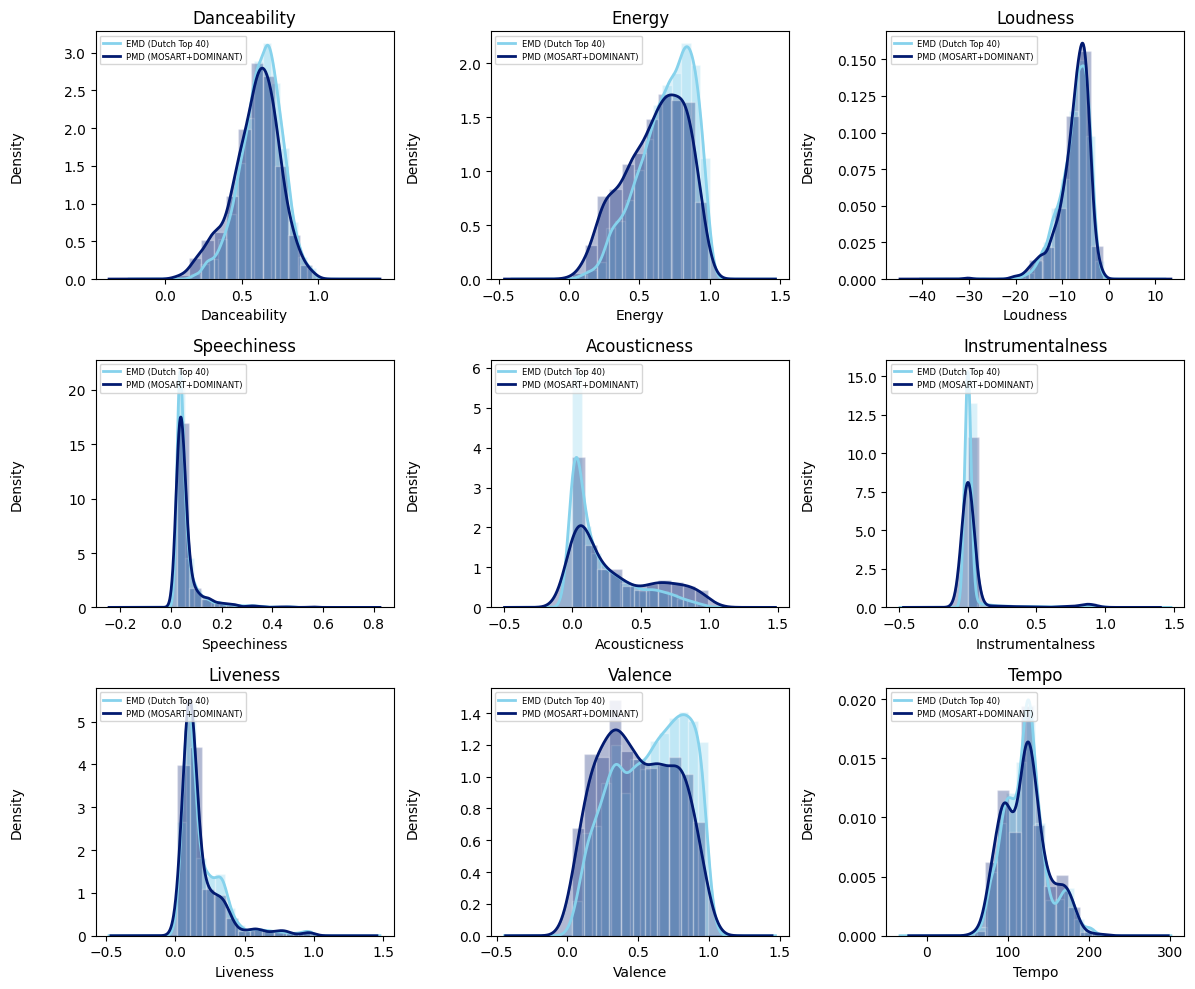


=== Statistical Test Results for Genre: Pop ===


,Feature,Mann-Whitney U statistic,Mann-Whitney p-value,Mann-Whitney significant,KS statistic,KS p-value,KS significant,Cliff's Delta,Effect Size magnitude
0,Danceability,1555343.0,4.691523e-09,Yes,0.103297,1.047157e-05,Yes,0.142267,negligible
1,Energy,1666084.5,3.370182e-20,Yes,0.154531,2.992989e-12,Yes,0.223597,small
2,Loudness,1360308.0,9.681725e-01,No,0.043311,2.319276e-01,No,-0.000969,negligible
3,Speechiness,1359908.0,9.585317e-01,No,0.026144,8.233602e-01,No,-0.001263,negligible
4,Acousticness,1086092.5,7.954379e-17,Yes,0.146331,5.017981e-11,Yes,-0.202357,small
5,Instrumentalness,1419673.0,6.741433e-02,No,0.055612,5.811441e-02,No,0.042629,negligible
6,Liveness,1451536.5,6.552940e-03,Yes,0.107884,3.475520e-06,Yes,0.066030,negligible
7,Valence,1637493.5,7.310518e-17,Yes,0.153764,3.921719e-12,Yes,0.202600,small
8,Tempo,1387255.5,4.383776e-01,No,0.056046,5.499609e-02,No,0.018821,negligible


Hip Hop


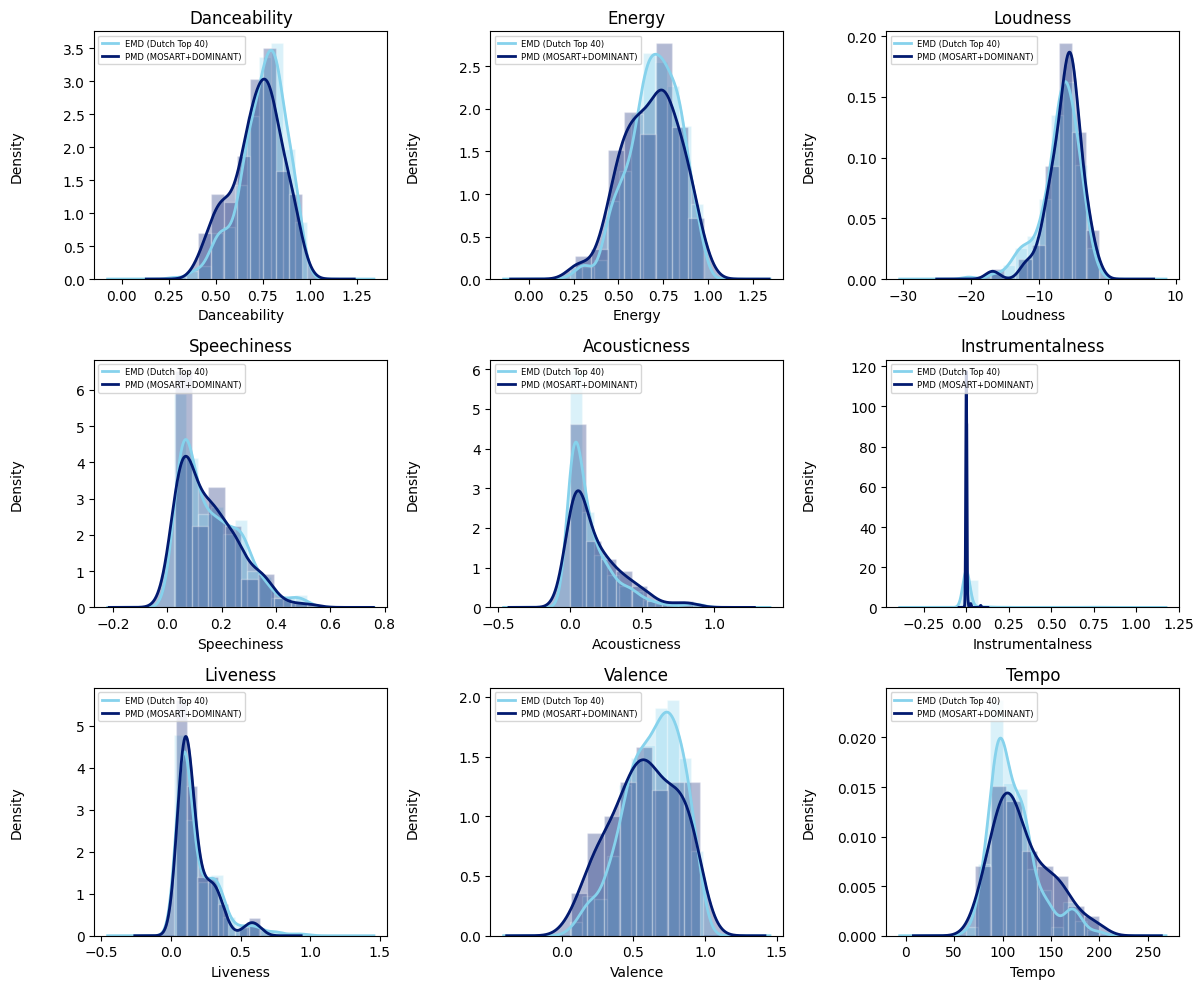


=== Statistical Test Results for Genre: Hip Hop ===


,Feature,Mann-Whitney U statistic,Mann-Whitney p-value,Mann-Whitney significant,KS statistic,KS p-value,KS significant,Cliff's Delta,Effect Size magnitude
0,Danceability,38323.0,0.006247,Yes,0.141809,0.031106,Yes,0.157515,small
1,Energy,35339.0,0.242124,No,0.109943,0.161184,No,0.067386,negligible
2,Loudness,28112.5,0.008808,Yes,0.168660,0.005624,Yes,-0.150885,small
3,Speechiness,34563.0,0.445612,No,0.074665,0.597855,No,0.043947,negligible
4,Acousticness,28959.0,0.029593,Yes,0.111937,0.147195,No,-0.125317,negligible
5,Instrumentalness,35959.5,0.099479,No,0.080615,0.500357,No,0.086127,negligible
6,Liveness,33296.5,0.921465,No,0.070225,0.672835,No,0.005693,negligible
7,Valence,37650.5,0.017226,Yes,0.146098,0.024140,Yes,0.137202,negligible
8,Tempo,27631.0,0.004080,Yes,0.156337,0.012789,Yes,-0.165428,small


Electronic


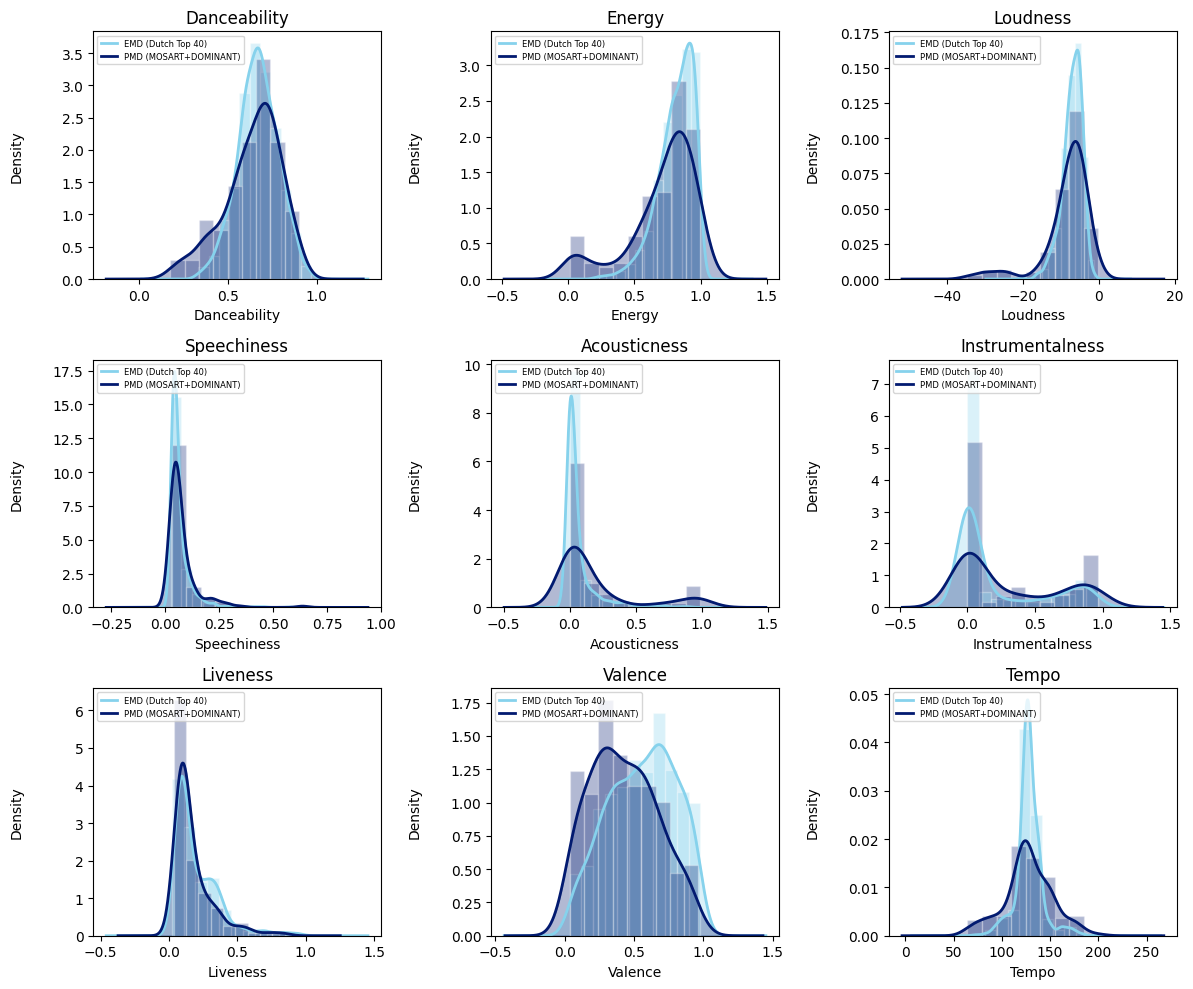


=== Statistical Test Results for Genre: Electronic ===


,Feature,Mann-Whitney U statistic,Mann-Whitney p-value,Mann-Whitney significant,KS statistic,KS p-value,KS significant,Cliff's Delta,Effect Size magnitude
0,Danceability,87662.0,1.901880e-01,No,0.116491,3.972839e-02,Yes,0.063730,negligible
1,Energy,99870.0,1.328269e-05,Yes,0.194430,3.801237e-05,Yes,0.211867,small
2,Loudness,86027.0,3.669744e-01,No,0.114398,4.562260e-02,Yes,0.043890,negligible
3,Speechiness,73669.5,2.923904e-02,Yes,0.097009,1.307742e-01,No,-0.106061,negligible
4,Acousticness,62993.0,1.275374e-06,Yes,0.213129,4.228204e-06,Yes,-0.235615,small
5,Instrumentalness,70141.0,2.176729e-03,Yes,0.137277,8.776051e-03,Yes,-0.148878,small
6,Liveness,90310.0,4.877150e-02,Yes,0.129996,1.532868e-02,Yes,0.095862,negligible
7,Valence,107664.5,2.981090e-10,Yes,0.245905,5.456308e-08,Yes,0.306449,small
8,Tempo,86048.0,3.641985e-01,No,0.203998,1.268315e-05,Yes,0.044145,negligible


R&B


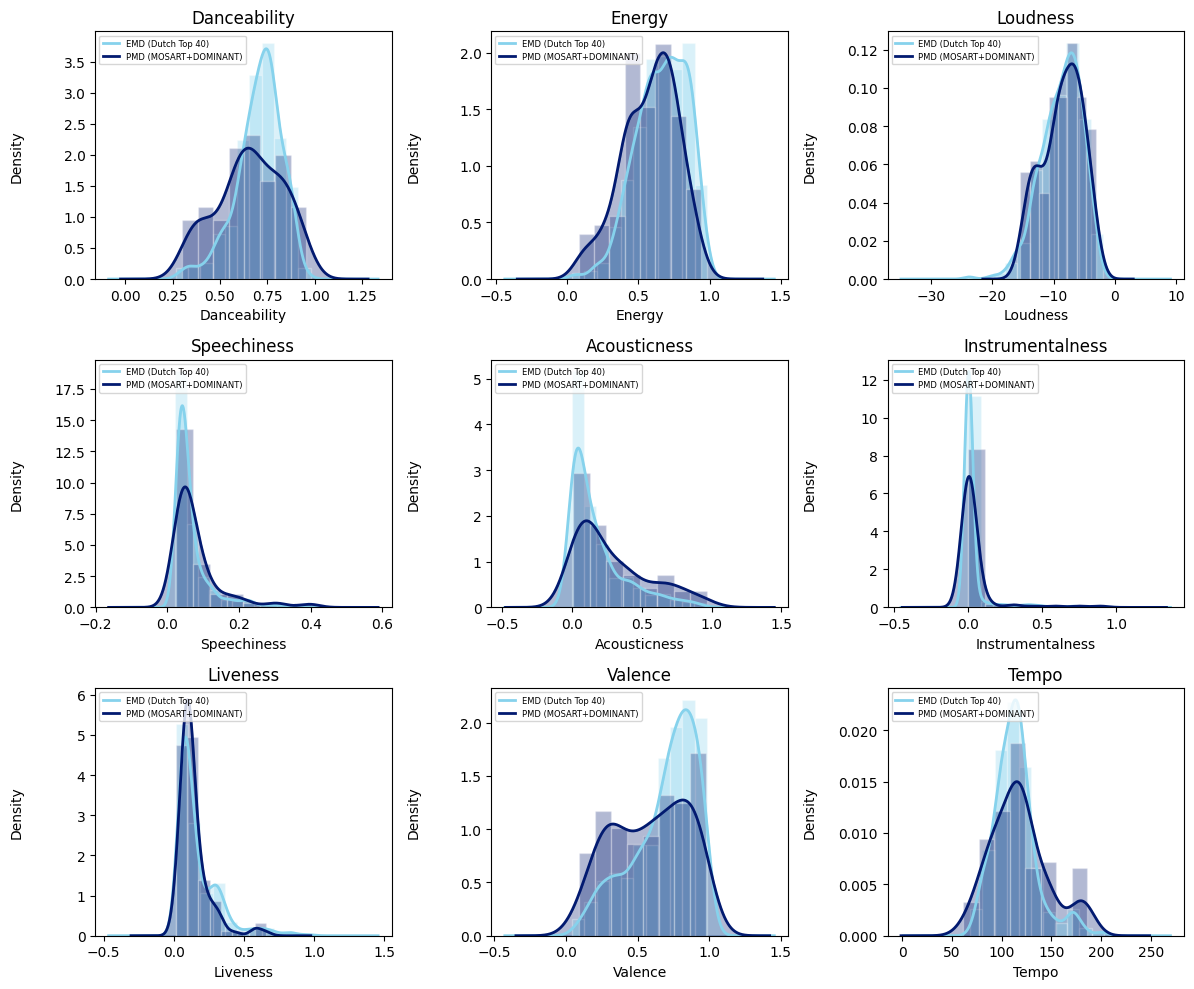


=== Statistical Test Results for Genre: R&B ===


,Feature,Mann-Whitney U statistic,Mann-Whitney p-value,Mann-Whitney significant,KS statistic,KS p-value,KS significant,Cliff's Delta,Effect Size magnitude
0,Danceability,55340.0,0.002675,Yes,0.216068,0.000122,Yes,0.172160,small
1,Energy,58629.5,0.000025,Yes,0.192536,0.000894,Yes,0.241835,small
2,Loudness,46117.0,0.685933,No,0.064390,0.766924,No,-0.023193,negligible
3,Speechiness,40394.5,0.011780,Yes,0.157396,0.011488,Yes,-0.144402,negligible
4,Acousticness,34155.0,0.000001,Yes,0.200055,0.000488,Yes,-0.276561,small
5,Instrumentalness,46774.5,0.870371,No,0.066763,0.728224,No,-0.009267,negligible
6,Liveness,49038.5,0.499899,No,0.136067,0.041869,Yes,0.038687,negligible
7,Valence,58070.0,0.000060,Yes,0.223799,0.000060,Yes,0.229984,small
8,Tempo,43437.0,0.163151,No,0.122554,0.086207,No,-0.079958,negligible


Rock


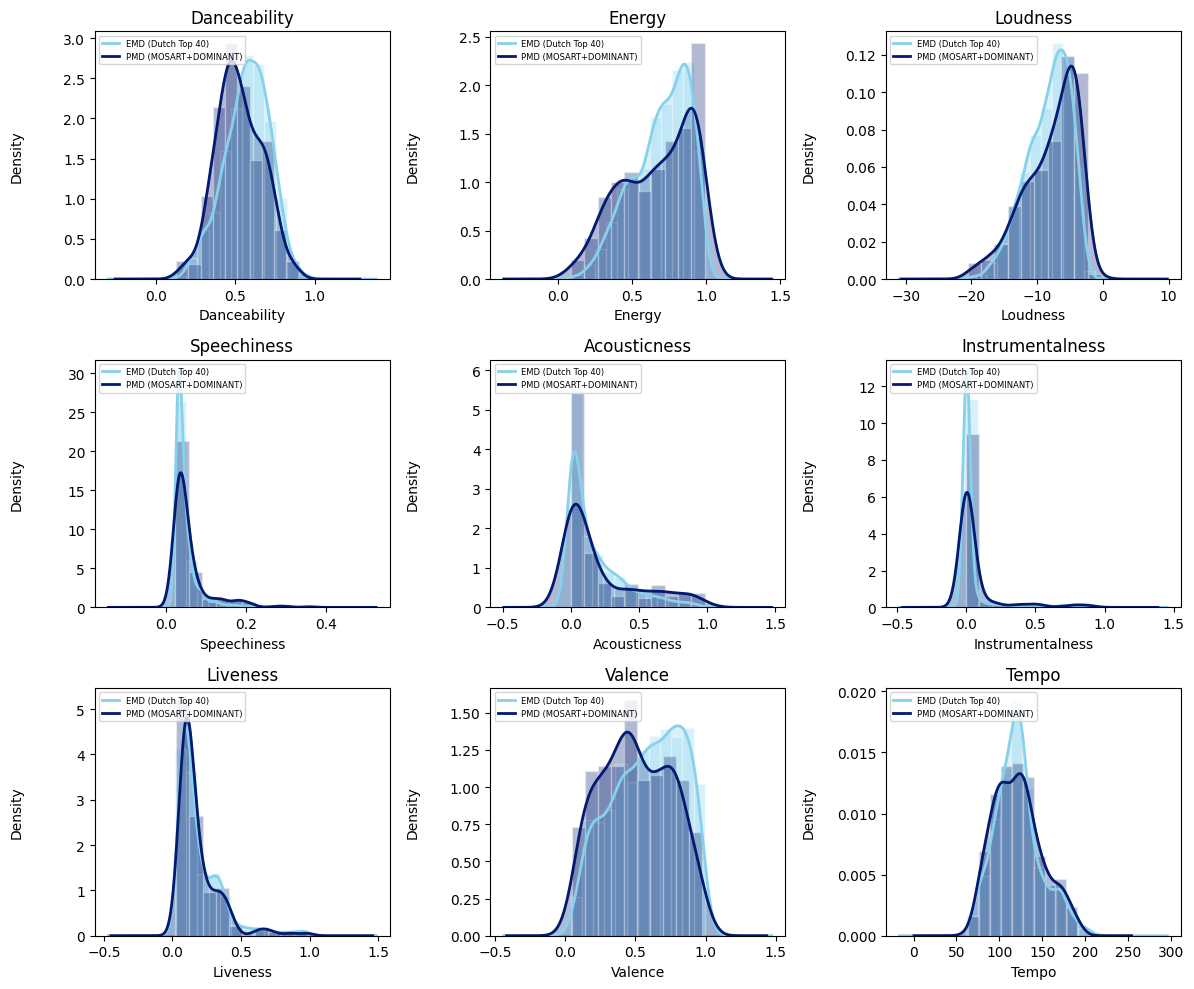


=== Statistical Test Results for Genre: Rock ===


,Feature,Mann-Whitney U statistic,Mann-Whitney p-value,Mann-Whitney significant,KS statistic,KS p-value,KS significant,Cliff's Delta,Effect Size magnitude
0,Danceability,368905.5,1.372358e-09,Yes,0.197000,3.402526e-10,Yes,0.206915,small
1,Energy,315926.0,3.254085e-01,No,0.124720,2.442684e-04,Yes,0.033586,negligible
2,Loudness,270538.5,7.668824e-04,Yes,0.151210,3.560642e-06,Yes,-0.114904,negligible
3,Speechiness,272776.5,1.632110e-03,Yes,0.092518,1.389169e-02,Yes,-0.107582,negligible
4,Acousticness,313742.5,4.387946e-01,No,0.114434,1.012018e-03,Yes,0.026443,negligible
5,Instrumentalness,282088.0,2.272790e-02,Yes,0.084241,3.233488e-02,Yes,-0.077118,negligible
6,Liveness,310330.5,6.546056e-01,No,0.071773,9.945120e-02,No,0.015280,negligible
7,Valence,362821.0,4.355323e-08,Yes,0.164176,3.332831e-07,Yes,0.187008,small
8,Tempo,305745.0,9.935413e-01,No,0.070650,1.090704e-01,No,0.000278,negligible


Folk/Acoustic


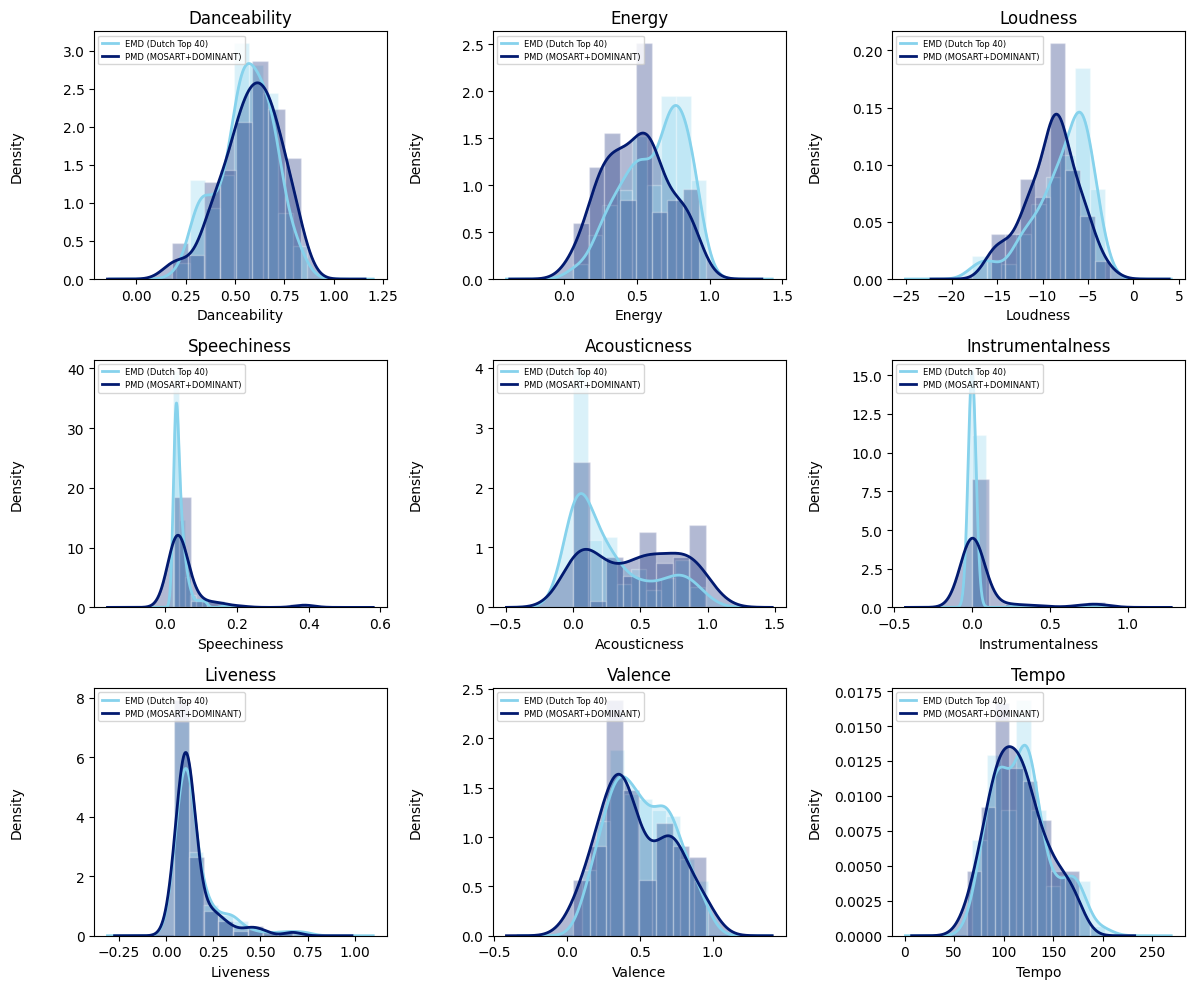


=== Statistical Test Results for Genre: Folk/Acoustic ===


,Feature,Mann-Whitney U statistic,Mann-Whitney p-value,Mann-Whitney significant,KS statistic,KS p-value,KS significant,Cliff's Delta,Effect Size magnitude
0,Danceability,6416.5,0.165228,No,0.109244,0.495139,No,-0.108758,negligible
1,Energy,9423.5,0.000080,Yes,0.287242,0.000181,Yes,0.308910,small
2,Loudness,9069.0,0.000918,Yes,0.297173,0.000094,Yes,0.259671,small
3,Speechiness,6694.5,0.370950,No,0.098549,0.624591,No,-0.070144,negligible
4,Acousticness,4812.0,0.000023,Yes,0.300993,0.000072,Yes,-0.331620,medium
5,Instrumentalness,5380.0,0.000963,Yes,0.252865,0.001472,Yes,-0.252726,small
6,Liveness,7650.5,0.424321,No,0.119175,0.386989,No,0.062643,negligible
7,Valence,7833.5,0.261247,No,0.130634,0.281934,No,0.088062,negligible
8,Tempo,7754.5,0.325439,No,0.119175,0.386989,No,0.077089,negligible


Metal


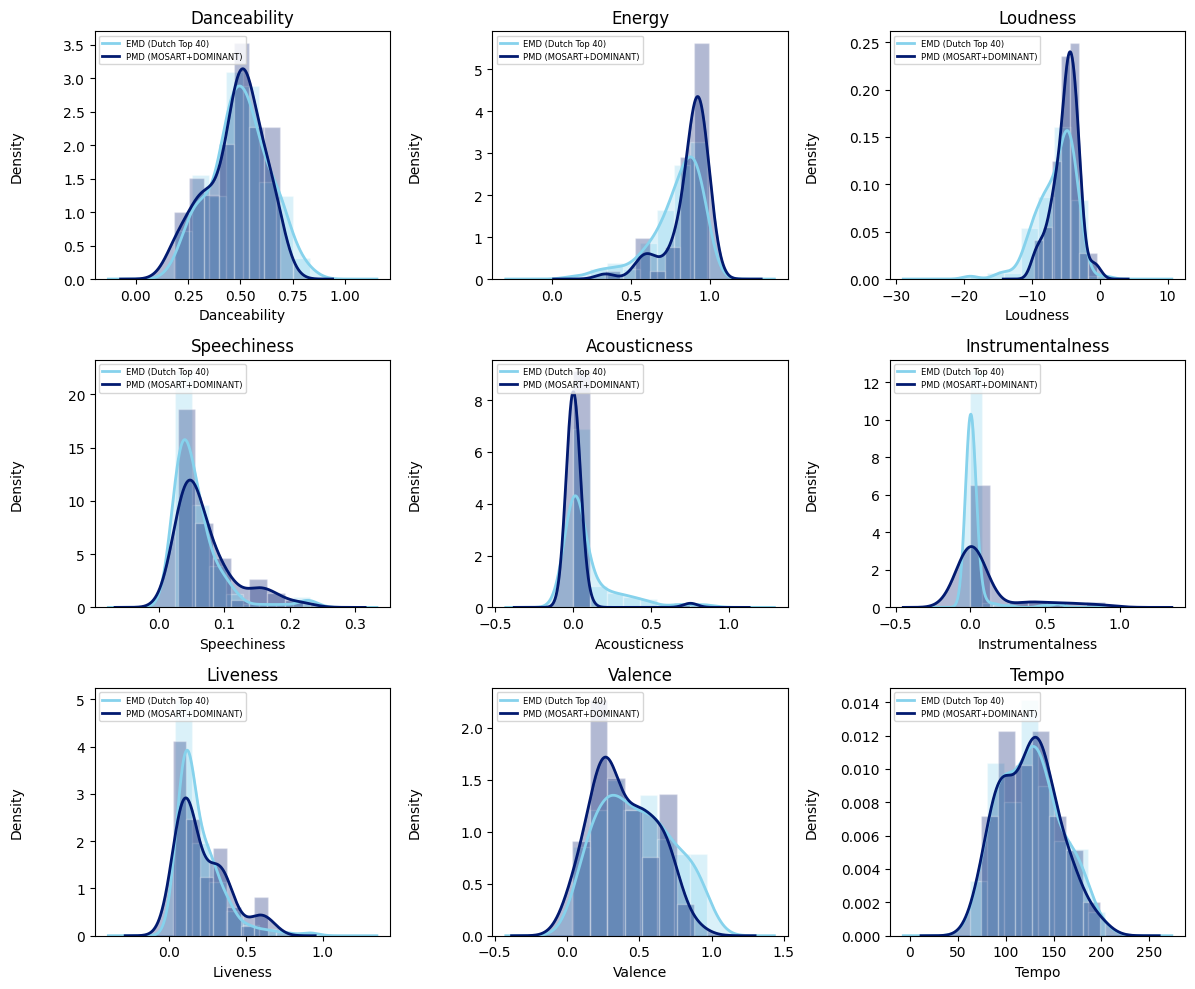


=== Statistical Test Results for Genre: Metal ===


,Feature,Mann-Whitney U statistic,Mann-Whitney p-value,Mann-Whitney significant,KS statistic,KS p-value,KS significant,Cliff's Delta,Effect Size magnitude
0,Danceability,3581.5,4.184372e-01,No,0.122314,5.784394e-01,No,0.076334,negligible
1,Energy,2140.0,1.514032e-04,Yes,0.400000,6.261430e-06,Yes,-0.356875,medium
2,Loudness,2305.0,1.106277e-03,Yes,0.262810,8.645127e-03,Yes,-0.307288,small
3,Speechiness,2565.5,1.507540e-02,Yes,0.201653,7.969305e-02,No,-0.229001,small
4,Acousticness,5295.0,3.423132e-10,Yes,0.500826,3.580968e-09,Yes,0.591285,large
5,Instrumentalness,2482.5,6.648646e-03,Yes,0.226446,3.479807e-02,Yes,-0.253944,small
6,Liveness,3254.0,8.157586e-01,No,0.150413,3.243970e-01,No,-0.022089,negligible
7,Valence,3965.5,4.187184e-02,Yes,0.178512,1.582430e-01,No,0.191736,small
8,Tempo,3362.0,9.135828e-01,No,0.061157,9.970240e-01,No,0.010368,negligible


World/Traditional


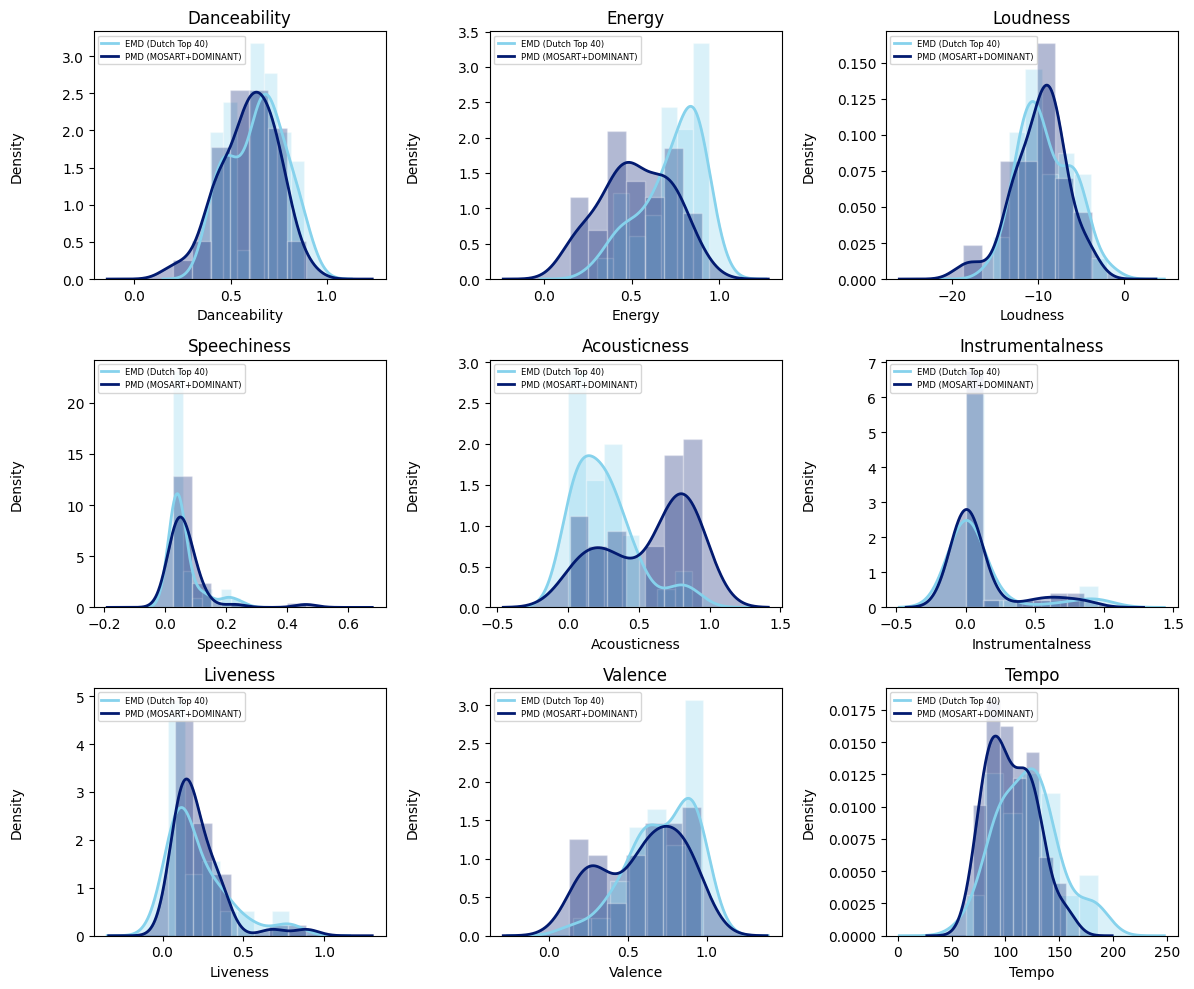


=== Statistical Test Results for Genre: World/Traditional ===


,Feature,Mann-Whitney U statistic,Mann-Whitney p-value,Mann-Whitney significant,KS statistic,KS p-value,KS significant,Cliff's Delta,Effect Size magnitude
0,Danceability,839.0,0.217642,No,0.216667,0.284619,No,0.165278,small
1,Energy,1127.0,0.000023,Yes,0.447222,0.000594,Yes,0.565278,large
2,Loudness,775.0,0.570732,No,0.233333,0.212915,No,0.076389,negligible
3,Speechiness,610.5,0.256796,No,0.175000,0.537700,No,-0.152083,small
4,Acousticness,323.5,0.000038,Yes,0.541667,0.000012,Yes,-0.550694,large
5,Instrumentalness,582.0,0.144307,No,0.252778,0.145602,No,-0.191667,small
6,Liveness,641.5,0.417066,No,0.172222,0.559024,No,-0.109028,negligible
7,Valence,929.5,0.029680,Yes,0.250000,0.153331,No,0.290972,small
8,Tempo,957.0,0.013880,Yes,0.300000,0.051207,No,0.329167,small


Easy listening


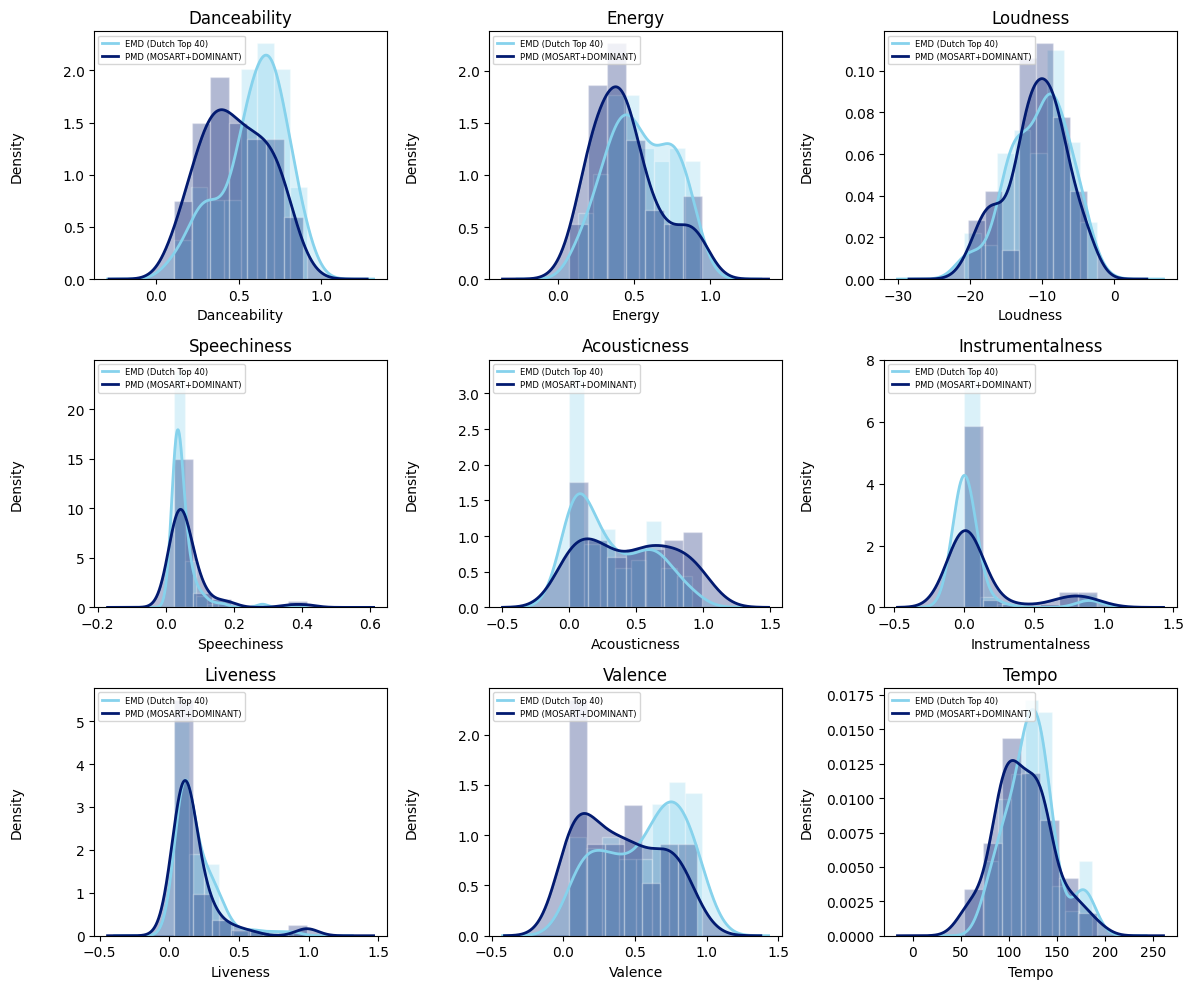


=== Statistical Test Results for Genre: Easy listening ===


,Feature,Mann-Whitney U statistic,Mann-Whitney p-value,Mann-Whitney significant,KS statistic,KS p-value,KS significant,Cliff's Delta,Effect Size magnitude
0,Danceability,3111.0,0.001638,Yes,0.300211,0.003159,Yes,0.312658,small
1,Energy,3001.5,0.007289,Yes,0.252954,0.020160,Yes,0.266456,small
2,Loudness,2473.0,0.662924,No,0.091139,0.905142,No,0.043460,negligible
3,Speechiness,1895.5,0.043828,Yes,0.233755,0.038992,Yes,-0.200211,small
4,Acousticness,1825.0,0.020586,Yes,0.221519,0.058251,No,-0.229958,small
5,Instrumentalness,2022.0,0.129613,No,0.226793,0.049073,Yes,-0.146835,negligible
6,Liveness,2688.0,0.176945,No,0.176371,0.206379,No,0.134177,negligible
7,Valence,3133.5,0.001176,Yes,0.282278,0.006626,Yes,0.322152,small
8,Tempo,2779.0,0.082362,No,0.230169,0.044151,Yes,0.172574,small


Jazz


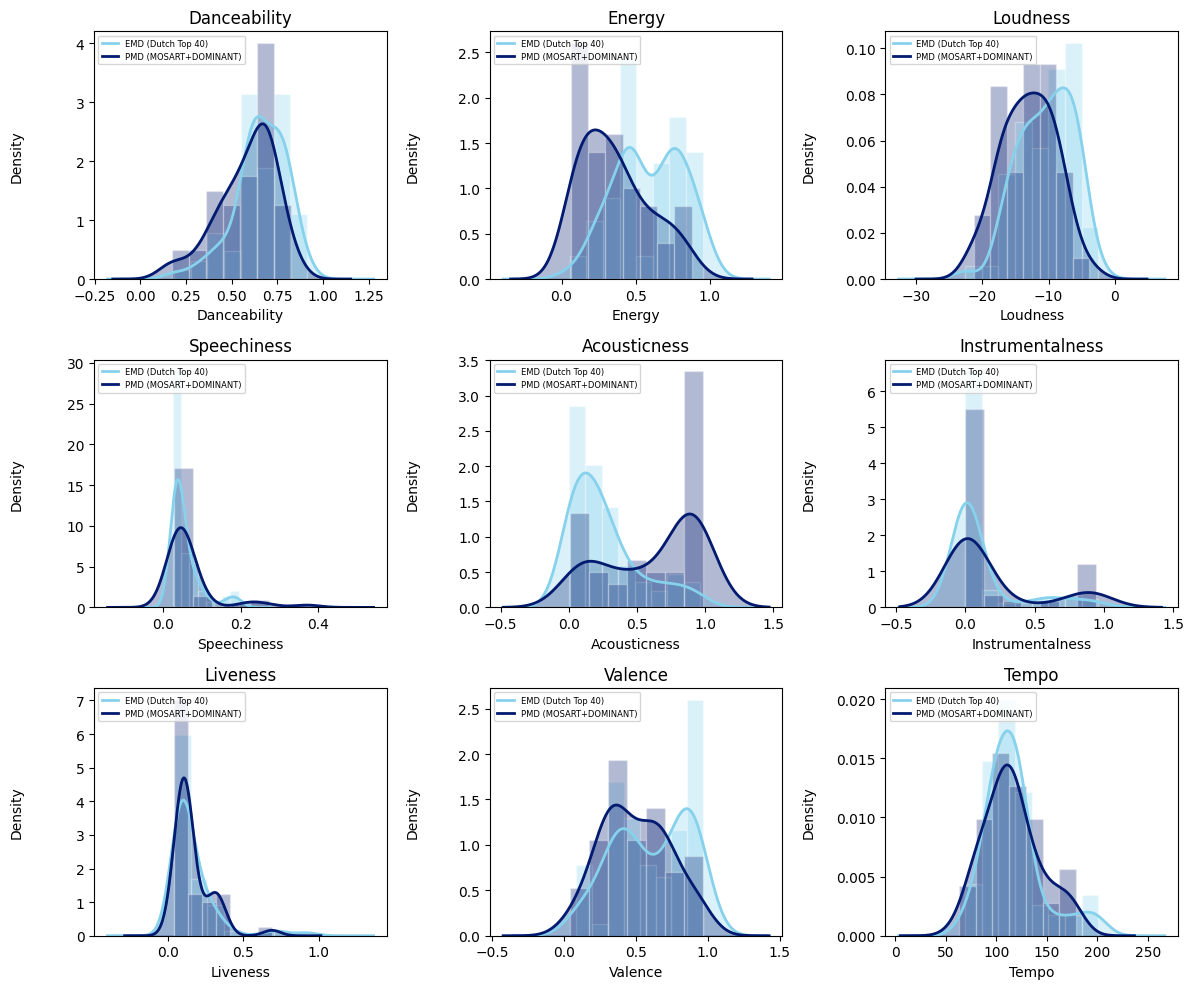


=== Statistical Test Results for Genre: Jazz ===


,Feature,Mann-Whitney U statistic,Mann-Whitney p-value,Mann-Whitney significant,KS statistic,KS p-value,KS significant,Cliff's Delta,Effect Size magnitude
0,Danceability,1916.5,1.507311e-02,Yes,0.269435,3.252955e-02,Yes,0.273422,small
1,Energy,2295.0,3.027780e-06,Yes,0.469103,7.710053e-06,Yes,0.524917,large
2,Loudness,2048.0,1.335824e-03,Yes,0.298007,1.313296e-02,Yes,0.360797,medium
3,Speechiness,1294.0,2.131841e-01,No,0.174751,3.384817e-01,No,-0.140199,negligible
4,Acousticness,657.5,5.473440e-07,Yes,0.511960,6.510130e-07,Yes,-0.563123,large
5,Instrumentalness,1350.5,3.604218e-01,No,0.134219,6.604142e-01,No,-0.102658,negligible
6,Liveness,1369.5,4.246540e-01,No,0.201329,1.952699e-01,No,-0.090033,negligible
7,Valence,1892.5,2.210189e-02,Yes,0.298007,1.313296e-02,Yes,0.257475,small
8,Tempo,1505.0,1.000000e+00,No,0.130897,6.909603e-01,No,0.000000,negligible


Latin


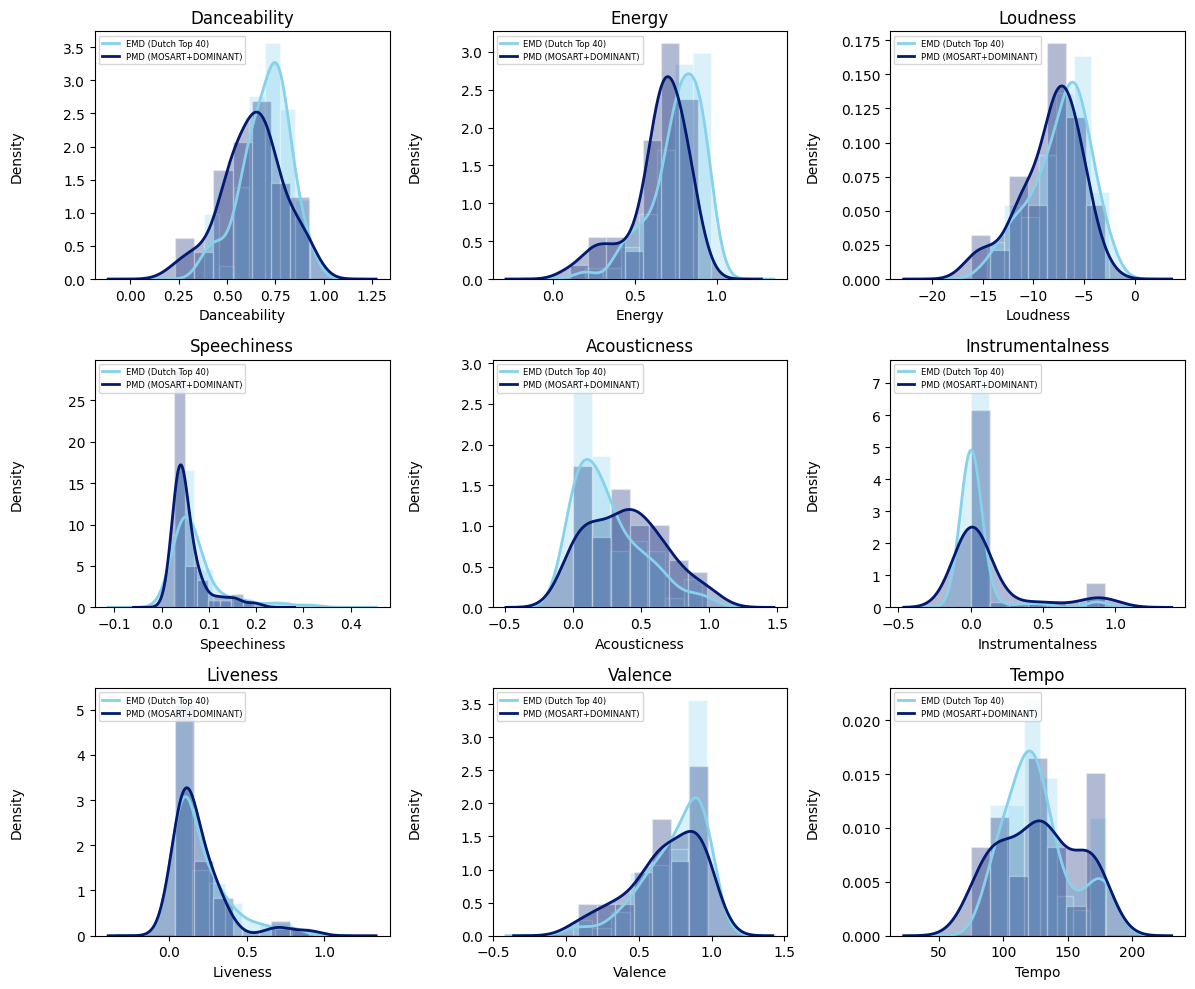


=== Statistical Test Results for Genre: Latin ===


,Feature,Mann-Whitney U statistic,Mann-Whitney p-value,Mann-Whitney significant,KS statistic,KS p-value,KS significant,Cliff's Delta,Effect Size magnitude
0,Danceability,2020.0,0.008899,Yes,0.269452,0.027958,Yes,0.288265,small
1,Energy,2233.5,0.000117,Yes,0.354911,0.001249,Yes,0.424426,medium
2,Loudness,1878.0,0.072950,No,0.219069,0.116249,No,0.197704,small
3,Speechiness,1933.5,0.034453,Yes,0.381378,0.000397,Yes,0.233099,small
4,Acousticness,1135.0,0.012218,Yes,0.293686,0.012664,Yes,-0.276148,small
5,Instrumentalness,978.0,0.000590,Yes,0.362245,0.000913,Yes,-0.376276,medium
6,Liveness,1594.5,0.880260,No,0.117985,0.779133,No,0.016901,negligible
7,Valence,1779.0,0.222606,No,0.171237,0.339564,No,0.134566,negligible
8,Tempo,1549.0,0.914644,No,0.143495,0.554703,No,-0.012117,negligible


Country


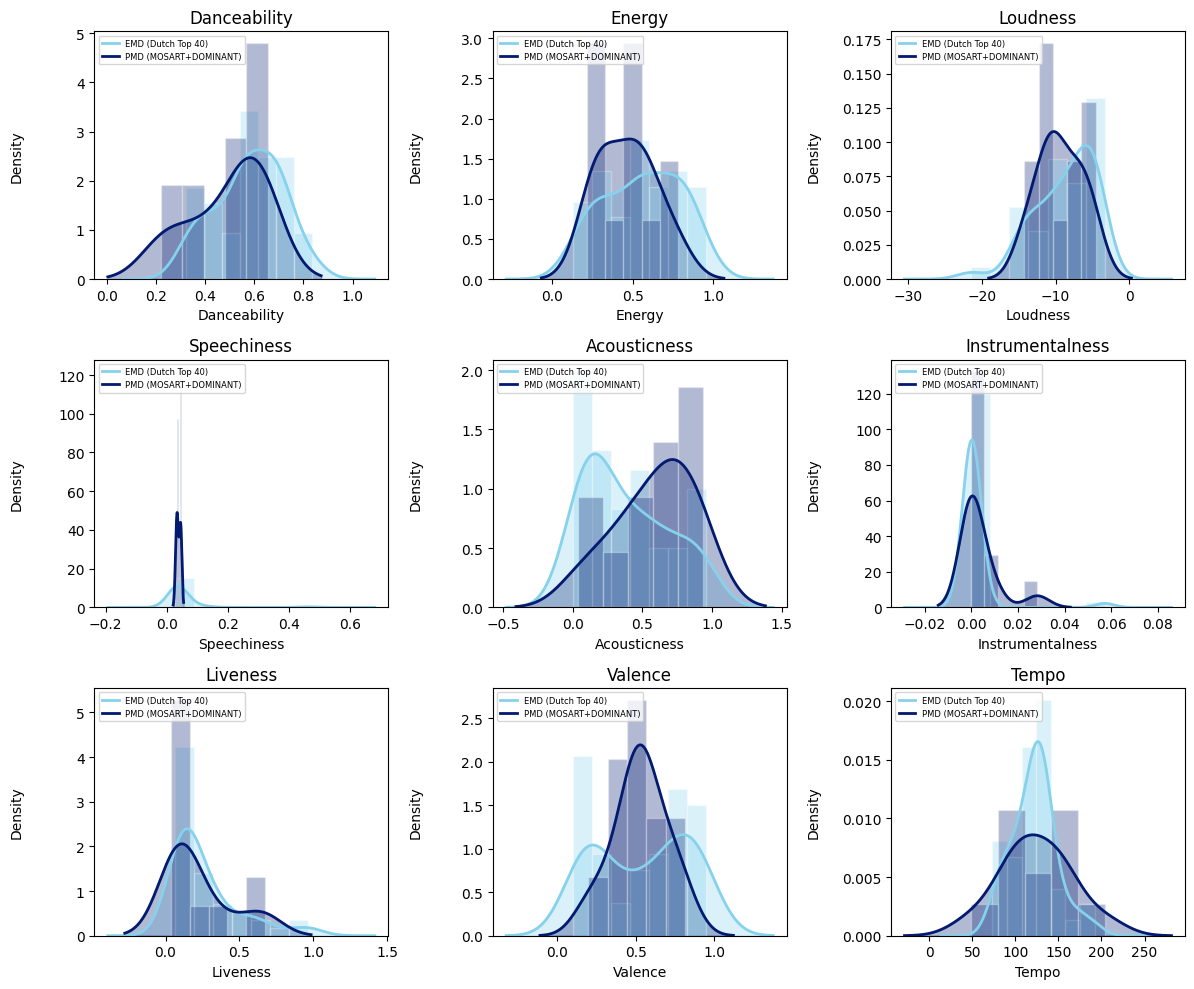


=== Statistical Test Results for Genre: Country ===


,Feature,Mann-Whitney U statistic,Mann-Whitney p-value,Mann-Whitney significant,KS statistic,KS p-value,KS significant,Cliff's Delta,Effect Size magnitude
0,Danceability,348.5,0.093463,No,0.318182,0.243831,No,0.320076,small
1,Energy,333.0,0.171341,No,0.295455,0.321989,No,0.261364,small
2,Loudness,308.5,0.379604,No,0.234848,0.598229,No,0.168561,small
3,Speechiness,216.5,0.347922,No,0.356061,0.144051,No,-0.179924,small
4,Acousticness,161.5,0.041669,Yes,0.401515,0.071699,No,-0.388258,medium
5,Instrumentalness,184.0,0.084420,No,0.363636,0.130684,No,-0.303030,small
6,Liveness,320.5,0.263427,No,0.287879,0.349681,No,0.214015,small
7,Valence,273.5,0.857342,No,0.280303,0.382175,No,0.035985,negligible
8,Tempo,254.5,0.857373,No,0.280303,0.382175,No,-0.035985,negligible


Blues


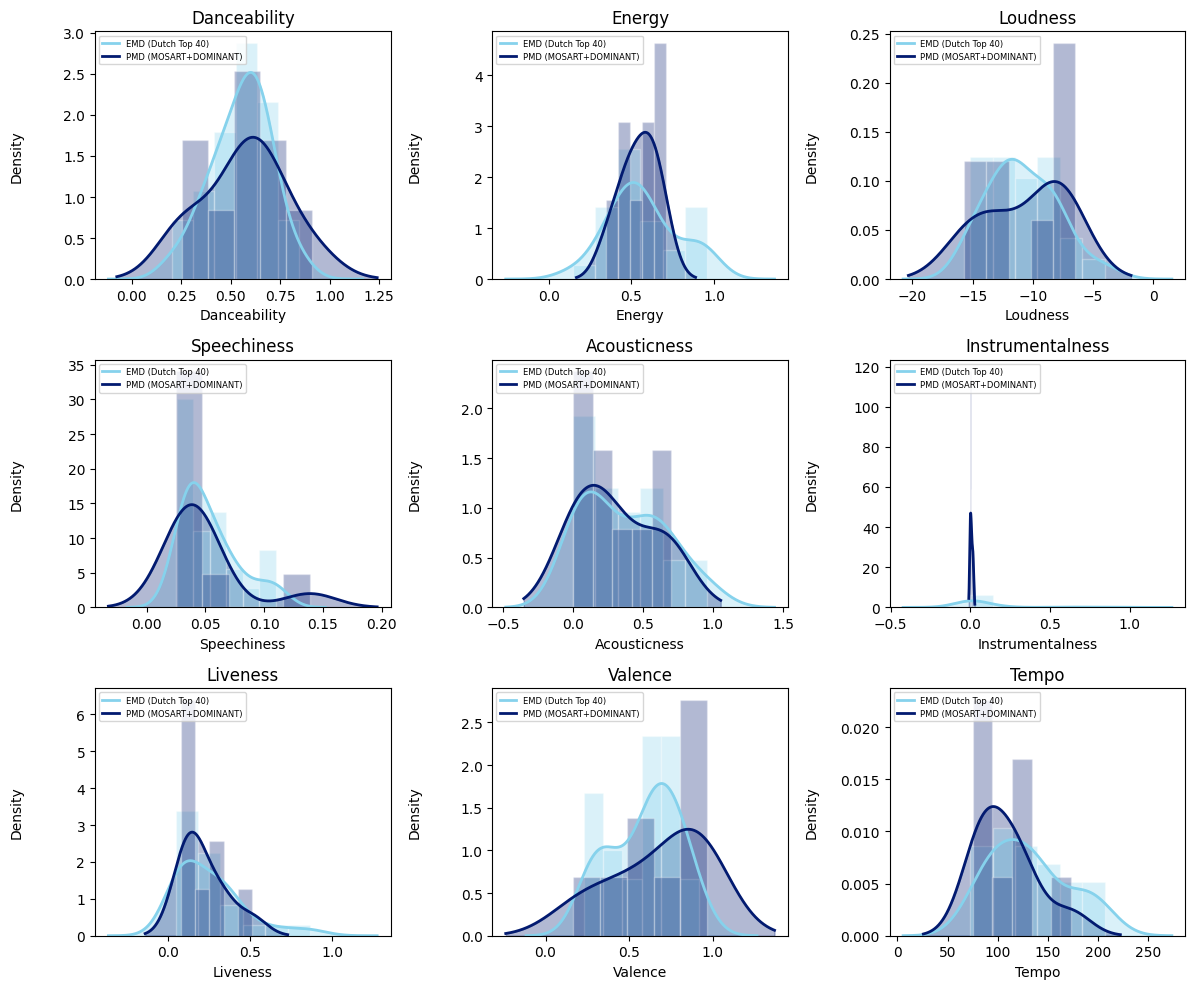


=== Statistical Test Results for Genre: Blues ===


,Feature,Mann-Whitney U statistic,Mann-Whitney p-value,Mann-Whitney significant,KS statistic,KS p-value,KS significant,Cliff's Delta,Effect Size magnitude
0,Danceability,110.0,0.806164,No,0.183761,0.936037,No,-0.059829,negligible
1,Energy,120.5,0.909844,No,0.230769,0.791693,No,0.029915,negligible
2,Loudness,109.5,0.791613,No,0.290598,0.510771,No,-0.064103,negligible
3,Speechiness,142.5,0.345325,No,0.316239,0.426529,No,0.217949,small
4,Acousticness,128.5,0.677997,No,0.179487,0.947138,No,0.098291,negligible
5,Instrumentalness,119.5,0.939820,No,0.230769,0.791693,No,0.021368,negligible
6,Liveness,117.5,1.000000,No,0.200855,0.896391,No,0.004274,negligible
7,Valence,86.0,0.249605,No,0.440171,0.098668,No,-0.264957,small
8,Tempo,160.5,0.104580,No,0.354701,0.294683,No,0.371795,medium


Classical


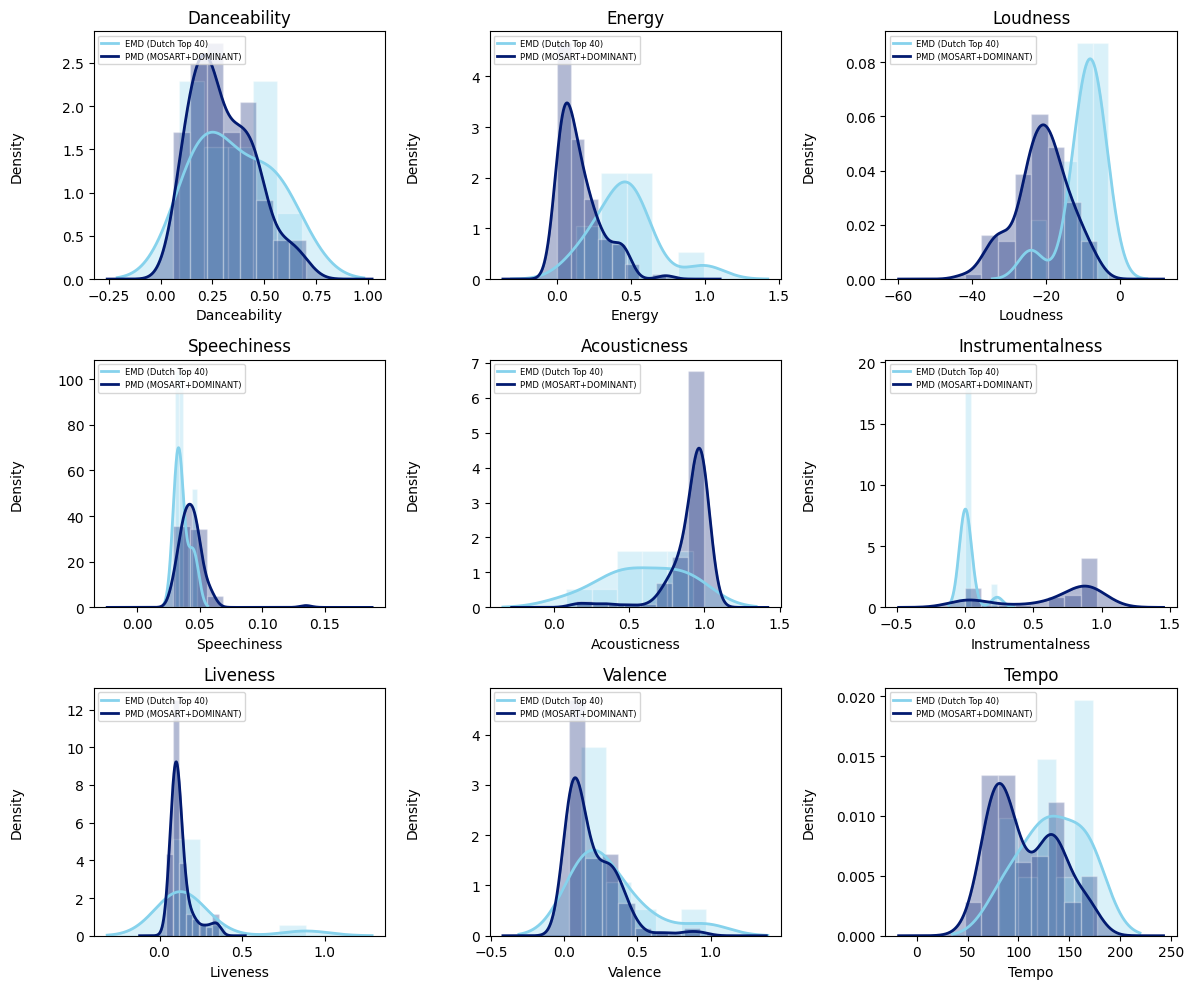


=== Statistical Test Results for Genre: Classical ===


,Feature,Mann-Whitney U statistic,Mann-Whitney p-value,Mann-Whitney significant,KS statistic,KS p-value,KS significant,Cliff's Delta,Effect Size magnitude
0,Danceability,713.5,0.330163,No,0.272727,3.911762e-01,No,0.179339,small
1,Energy,1098.0,0.000009,Yes,0.700000,2.615740e-05,Yes,0.814876,large
2,Loudness,1093.0,0.000011,Yes,0.800000,3.927243e-07,Yes,0.806612,large
3,Speechiness,287.0,0.004199,Yes,0.563636,1.825433e-03,Yes,-0.525620,large
4,Acousticness,140.0,0.000028,Yes,0.681818,5.012527e-05,Yes,-0.768595,large
5,Instrumentalness,73.5,0.000002,Yes,0.781818,9.229429e-07,Yes,-0.878512,large
6,Liveness,704.5,0.372037,No,0.209091,7.176769e-01,No,0.164463,small
7,Valence,846.0,0.030127,Yes,0.472727,1.562094e-02,Yes,0.398347,medium
8,Tempo,887.0,0.011146,Yes,0.390909,7.362335e-02,No,0.466116,medium


New age


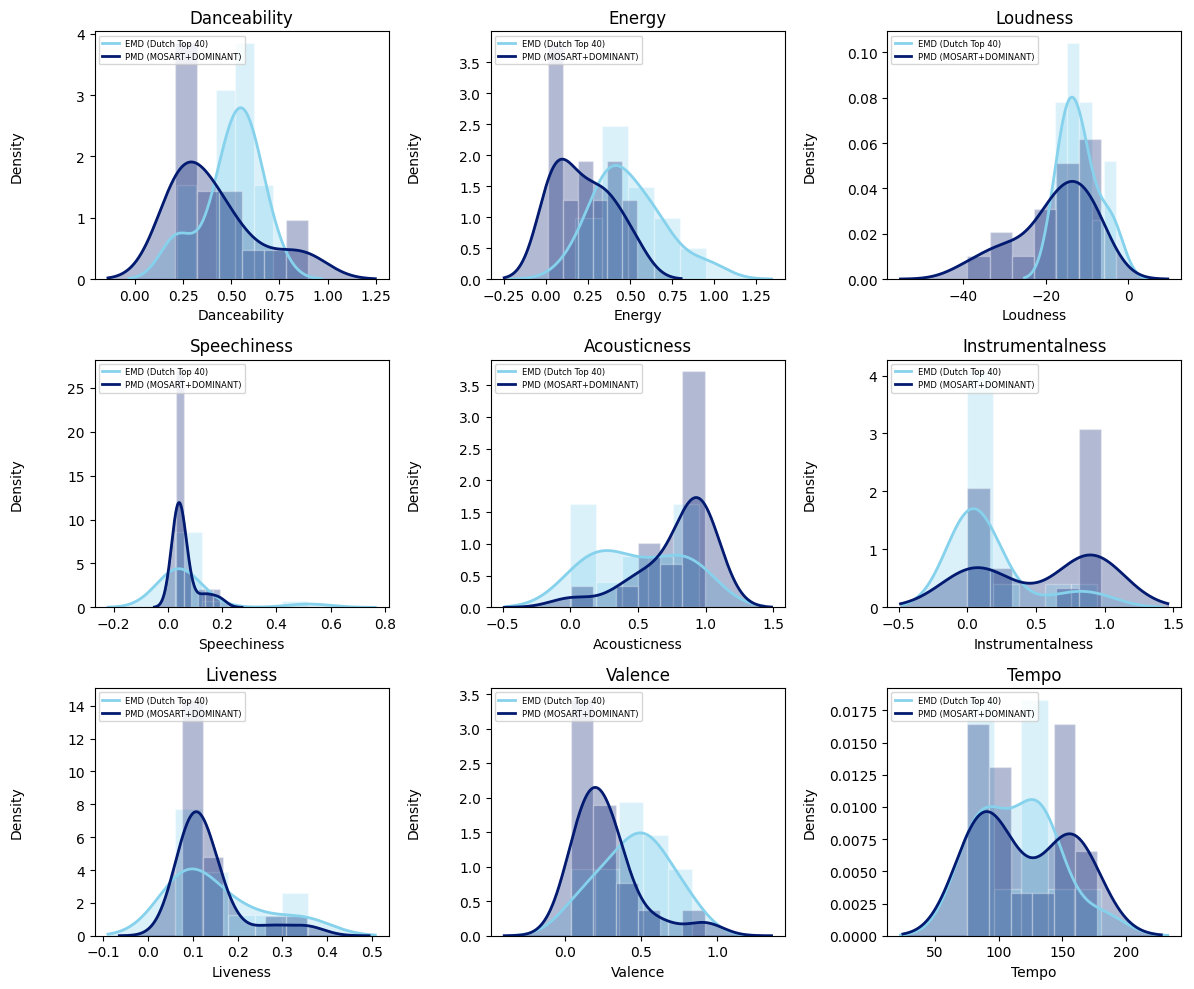


=== Statistical Test Results for Genre: New age ===


,Feature,Mann-Whitney U statistic,Mann-Whitney p-value,Mann-Whitney significant,KS statistic,KS p-value,KS significant,Cliff's Delta,Effect Size magnitude
0,Danceability,156.5,0.118391,No,0.470085,0.049686,Yes,0.337607,medium
1,Energy,197.5,0.001361,Yes,0.568376,0.008779,Yes,0.688034,large
2,Loudness,160.5,0.085151,No,0.401709,0.130225,No,0.371795,medium
3,Speechiness,88.0,0.253762,No,0.294872,0.427842,No,-0.247863,small
4,Acousticness,54.5,0.013047,Yes,0.427350,0.089267,No,-0.534188,large
5,Instrumentalness,62.5,0.030270,Yes,0.491453,0.034959,Yes,-0.465812,medium
6,Liveness,118.5,0.968064,No,0.252137,0.622305,No,0.012821,negligible
7,Valence,173.5,0.024945,Yes,0.525641,0.019770,Yes,0.482906,large
8,Tempo,102.5,0.575135,No,0.311966,0.369303,No,-0.123932,negligible


In [ ]:
# Define Spotify features
saf = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]

# Get unique genres
unique_genres = pd.concat([genres_SAF_EMD['reducedGenre'], genres_SAF_PMD['reducedGenre']]).unique()

# Define colors for the datasets
color_EMD = "#86D2EC"  # light blue for EMD (Everyday Music Dataset)
color_PMD = "#021A70"  # dark blue for PMD (Pain Music Dataset)

# Enable histogram display
enable_histogram = True

# Threshold for significance
alpha = 0.05

# Dictionary to store test results for each genre
test_results = {}

for genre in unique_genres:
    # Filter data by genre
    emd_genre_data = genres_SAF_EMD[genres_SAF_EMD['reducedGenre'] == genre]
    pmd_genre_data = genres_SAF_PMD[genres_SAF_PMD['reducedGenre'] == genre]

    # Set up the subplot grid for features
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
    axes = axes.flatten()  # Flatten to easily iterate over

    for idx, feature in enumerate(saf):
        ax = axes[idx]

        # Density plot for EMD dataset
        density_emd = emd_genre_data[feature].plot(kind='density', ax=ax, color=color_EMD, label='EMD (Dutch Top 40)', linewidth=2)
        x_vals_emd = density_emd.get_lines()[0].get_xdata()
        y_vals_emd = density_emd.get_lines()[0].get_ydata()
        ax.fill_between(x_vals_emd, y_vals_emd, color=color_EMD, alpha=0.3)

        # Density plot for PMD dataset
        density_pmd = pmd_genre_data[feature].plot(kind='density', ax=ax, color=color_PMD, label='PMD (MOSART+DOMINANT)', linewidth=2)
        x_vals_pmd = density_pmd.get_lines()[1].get_xdata()
        y_vals_pmd = density_pmd.get_lines()[1].get_ydata()
        ax.fill_between(x_vals_pmd, y_vals_pmd, color=color_PMD, alpha=0.3)

        if enable_histogram:
            # Calculate the number of bins using Sturges' formula
            n_emd = len(emd_genre_data[feature].dropna())
            bins_emd = int(np.ceil(1 + np.log2(n_emd)))
            ax.hist(emd_genre_data[feature].dropna(), bins=bins_emd, color=color_EMD, alpha=0.3, density=True, edgecolor="white")

            n_pmd = len(pmd_genre_data[feature].dropna())
            bins_pmd = int(np.ceil(1 + np.log2(n_pmd)))
            ax.hist(pmd_genre_data[feature].dropna(), bins=bins_pmd, color=color_PMD, alpha=0.3, density=True, edgecolor="white")

        # Set titles and labels
        ax.set_title(f'{feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Density')

        # Add legend to each subplot
        ax.legend(loc='upper left', fontsize=6)

        # Set y-label position for consistent alignment
        ax.yaxis.set_label_coords(-0.24, 0.5)

    # Remove unused subplots if there are any
    for j in range(len(saf), len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout and save/show plot
    plt.tight_layout()
    print(f"{genre}")
    plt.show()

    # Perform statistical tests
    genre_results = []
    for feature in saf:
        emd_feature_data = emd_genre_data[feature].dropna()
        pmd_feature_data = pmd_genre_data[feature].dropna()

        # Mann-Whitney U test
        mannwhitney_result = mannwhitneyu(emd_feature_data, pmd_feature_data, alternative="two-sided")

        # Kolmogorov-Smirnov test
        ks_result = ks_2samp(emd_feature_data, pmd_feature_data)

        # Cliff's Delta
        delta, magnitude = cliffs_delta(emd_feature_data, pmd_feature_data)

        # Determine significance
        mannwhitney_significant = "Yes" if mannwhitney_result.pvalue < alpha else "No"
        ks_significant = "Yes" if ks_result.pvalue < alpha else "No"

        # Append results
        genre_results.append({
            "Feature": feature,
            "Mann-Whitney U statistic": mannwhitney_result.statistic,
            "Mann-Whitney p-value": mannwhitney_result.pvalue,
            "Mann-Whitney significant": mannwhitney_significant,
            "KS statistic": ks_result.statistic,
            "KS p-value": ks_result.pvalue,
            "KS significant": ks_significant,
            "Cliff's Delta": delta,
            "Effect Size magnitude": magnitude,
        })
    # Store results
    test_results[genre] = pd.DataFrame(genre_results)

    # Display results
    print(f"\n=== Statistical Test Results for Genre: {genre} ===")
    display(test_results[genre])